---
Projet 6 - Classer des images à l'aide d'algorithmes de Deep Learning<a class="tocSkip">
===
Dans le cadre d'un projet d'OpenClassrooms, on agit en tant que bénévole pour une association de protection des animaux de notre quartier. 
Ils ont une base de données de pensionnaires qui commence à s'agrandir et ils n'ont pas toujours le temps de référencer les images des animaux qu'ils ont accumulées depuis plusieurs années. 

![](http://domainedubiewer.com/wp-content/uploads/2020/01/vector-illustration-drawing-style-of-dog-breeds-collection.jpg")

### Problématique<a class="tocSkip">  
Pour aider l'association, on veut créer un **algorithme capable de classer les images en fonction de la race du chien présent sur l'image**.

### Pistes de recherche et contraintes<a class="tocSkip">  
* **Prétraiter les images** avec des techniques spécifiques ((e.g. whitening, equalization, éventuellement modification de la taille des images)
* Réaliser de l'**augmentation de données** (mirroring, cropping...)
* Réaliser notre propre **CNN de zéro (Convolution Neural Network)** en s'inspirant des réseaux existants en prenant soin d'optimiser certains hyperparamètres (couches, compilation, exécution)
* Réaliser du **transfert learning** en le modifiant pour répondre au problème (en réentrainant les dernières couches et en modifiant potentiellement la structure et taux d'apprentissage)
    
### Modèle transferé<a class="tocSkip"> 
Pour faire du **transfert learning** il faut choisir un modèle pré-entrainé optimal et adaptable à notre cas.  
Une liste de modèles déjà implémentés dans Keras est disponible [**ici**](https://keras.io/api/applications/).  
Les modèles ont été entrainés sur des tailles d'images spécifiques sur lesquels il faudra se caler. 
Le modèle sélectionné ici sera le [**MobileNetV2**](https://keras.io/api/applications/mobilenet/#mobilenetv2-function) pour:
* des résultats sur la fidélité plus que corrects (Top-5 $\approx0.9$)
* une taille faible ($14Mo$) pour peu de paramètres ($\approx3.500.000$)
* une profondeur moyenne ($88$ couches)
* mais surtout pour ses temps courts ($\approx26ms/pas$ sur CPU et $\approx4ms/pas$ sur GPU)

---

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librairies-/-Fonctions" data-toc-modified-id="Librairies-/-Fonctions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librairies / Fonctions</a></span></li><li><span><a href="#Hyperparamètres" data-toc-modified-id="Hyperparamètres-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Hyperparamètres</a></span></li><li><span><a href="#Outils" data-toc-modified-id="Outils-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Outils</a></span><ul class="toc-item"><li><span><a href="#Exploration" data-toc-modified-id="Exploration-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exploration</a></span></li><li><span><a href="#Redimensionnement" data-toc-modified-id="Redimensionnement-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Redimensionnement</a></span></li><li><span><a href="#Egalisation" data-toc-modified-id="Egalisation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Egalisation</a></span></li><li><span><a href="#Débruitage" data-toc-modified-id="Débruitage-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Débruitage</a></span></li><li><span><a href="#Augmentation" data-toc-modified-id="Augmentation-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Augmentation</a></span></li></ul></li><li><span><a href="#Mise-en-oeuvre" data-toc-modified-id="Mise-en-oeuvre-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mise en oeuvre</a></span><ul class="toc-item"><li><span><a href="#Prétraitement" data-toc-modified-id="Prétraitement-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Prétraitement</a></span></li><li><span><a href="#Initialisation" data-toc-modified-id="Initialisation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Initialisation</a></span></li></ul></li><li><span><a href="#CNN-de-zéro-1" data-toc-modified-id="CNN-de-zéro-1-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CNN de zéro 1</a></span><ul class="toc-item"><li><span><a href="#Construction" data-toc-modified-id="Construction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Construction</a></span></li><li><span><a href="#Entrainement" data-toc-modified-id="Entrainement-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Entrainement</a></span></li></ul></li><li><span><a href="#CNN-de-zéro-2" data-toc-modified-id="CNN-de-zéro-2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>CNN de zéro 2</a></span><ul class="toc-item"><li><span><a href="#Construction" data-toc-modified-id="Construction-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Construction</a></span></li><li><span><a href="#Entrainement" data-toc-modified-id="Entrainement-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Entrainement</a></span></li></ul></li><li><span><a href="#Rechargement" data-toc-modified-id="Rechargement-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Rechargement</a></span></li><li><span><a href="#Transfer-Learning-(FE)" data-toc-modified-id="Transfer-Learning-(FE)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Transfer Learning (FE)</a></span><ul class="toc-item"><li><span><a href="#Construction" data-toc-modified-id="Construction-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Construction</a></span></li><li><span><a href="#Entrainement" data-toc-modified-id="Entrainement-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Entrainement</a></span></li></ul></li><li><span><a href="#Tranfert-Learning-(RP)" data-toc-modified-id="Tranfert-Learning-(RP)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Tranfert Learning (RP)</a></span><ul class="toc-item"><li><span><a href="#Construction" data-toc-modified-id="Construction-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Construction</a></span></li><li><span><a href="#Entrainement" data-toc-modified-id="Entrainement-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Entrainement</a></span></li></ul></li><li><span><a href="#Comparatif" data-toc-modified-id="Comparatif-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Comparatif</a></span></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Optimization</a></span></li><li><span><a href="#Fine-tuning" data-toc-modified-id="Fine-tuning-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Fine tuning</a></span></li><li><span><a href="#Toutes-les-races" data-toc-modified-id="Toutes-les-races-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Toutes les races</a></span><ul class="toc-item"><li><span><a href="#Entrainement" data-toc-modified-id="Entrainement-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Entrainement</a></span></li><li><span><a href="#Matrices-de-confusion" data-toc-modified-id="Matrices-de-confusion-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Matrices de confusion</a></span></li></ul></li><li><span><a href="#Application" data-toc-modified-id="Application-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Application</a></span></li></ul></div>

---

# Librairies / Fonctions

In [1]:
# Système
import os
import warnings
import pickle

# Scientifiques
import numpy as np
import pandas as pd
import cv2

# Apprentissage
import sklearn as sk
import tensorflow as tf
import keras as kr
import keras_tuner as kt
from sklearn import preprocessing, model_selection, metrics
from keras import backend as K

# Visuel
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import gradio as gr
import ipywidgets as iw
from PIL import Image as PIL_Image

In [2]:
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})

In [3]:
device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
def cumulative_distribution(img):
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    cdf = hist.cumsum()
    return cdf * float(hist.max()) / cdf.max()

def preprocessing_image(address):
    '''Temps de traitement approximatif de 7ms.'''
    img = cv2.imread(address)                                                   # Lecture - 0.9ms
    res_img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)              # Redimensionnement - 0.1ms
    yuv = cv2.cvtColor(res_img, cv2.COLOR_BGR2YUV)                              # Egalisation - 0.2ms
    yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])
    rgb = cv2.cvtColor(yuv, cv2.COLOR_YUV2RGB)
    return rgb
#     rgdU = cv2.UMat(rgb)                                                        # Optimisation - 0.1ms
#     img = cv2.fastNlMeansDenoisingColored(src=rgdU, dst=None, h=10, hColor=10)  # Débruitage - 6ms
#     return img.get()

def preprocessing_lots(df):
    img_list, labels = [], []
    for index, address, breed in zip(df.index, df['Adresse'], df['Race']):
        img = preprocessing_image(address)
        img_list.append(img)
        labels.append(breed)
    return img_list, labels

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def plot_history_scores(dict_history, name, ymin=None):
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    ax[0].plot(dict_history.history['accuracy'], label='Entrainement')
    ax[0].plot(dict_history.history['val_accuracy'], label='Validation')
    ax[0].set_title(f'Evolution de la fidélité')
    ax[0].set_ylabel('Fidélité')
    ax[0].set_xlabel('Epoque')
    ax[0].legend()
    ax[0].grid(True)
    if ymin is not None: ax[0].set_ylim(0, ax[0].get_ylim()[1])
    ax[1].plot(dict_history.history['loss'], label='Entrainement')
    ax[1].plot(dict_history.history['val_loss'], label='Validation')
    ax[1].set_title(f'Evolution de la fonction de perte')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoque')
    ax[1].legend()
    ax[1].grid(True)
    fig.suptitle(name, fontsize=18)
    plt.show()
    
def df_scores(dict_history, NT=None, average='weighted'):
    scores = {
        'Train': {
            'Accuracy':     sk.metrics.accuracy_score(y_train[:NT], y_pred_train),
            'Recall':       sk.metrics.recall_score(y_train[:NT], y_pred_train, average=average),
            'Precision':    sk.metrics.precision_score(y_train[:NT], y_pred_train, average=average),
            'Hamming L':    sk.metrics.hamming_loss(y_train[:NT], y_pred_train),
            'F1 score':     sk.metrics.f1_score(y_train[:NT], y_pred_train, average=average),
            'Conf.Mat.':    sk.metrics.confusion_matrix(y_train[:NT], y_pred_train),
            'History Acc.': dict_history.history['accuracy'],
            'History Loss': dict_history.history['loss']},
        'Test': {
            'Accuracy':     sk.metrics.accuracy_score(y_test[:NT], y_pred_test),
            'Recall':       sk.metrics.recall_score(y_test[:NT], y_pred_test, average=average),
            'Precision':    sk.metrics.precision_score(y_test[:NT], y_pred_test, average=average),
            'Hamming L':    sk.metrics.hamming_loss(y_test[:NT], y_pred_test),
            'F1 score':     sk.metrics.f1_score(y_test[:NT], y_pred_test, average=average),
            'Conf.Mat.':    sk.metrics.confusion_matrix(y_test[:NT], y_pred_test),
            'History Acc.': dict_history.history['val_accuracy'],
            'History Loss': dict_history.history['val_loss']}}
    return pd.DataFrame.from_dict(scores).T

def cumulate_scores(mdf, name):
    global rdf
    try:
        rdf = rdf.append(pd.concat([mdf], keys=[name]))
    except:
        rdf = pd.concat([mdf], keys=[name])

---

# Hyperparamètres
Puisque le **tranfert learning** nous est imposé, il est nécessaire de traiter les images en se basant sur le modèle selectionné.  
Le modèle choisi (MobileNetV2) requiert des dimensions d'images d'entrée de $224\times224$ (en pixel). 

In [5]:
dim = (224,224)
batch_size = 37
epochs = 100
test_size = 0.2
verbose = 2

---

# Outils

In [6]:
# Chemin vers les images
images_dir = 'images'
breed_list = os.listdir(images_dir)
num_breeds = len(breed_list) 
breed_names = [breed.split('-',1)[1].replace('_',' ').title() for breed in breed_list]
n_images_per_breed = [len(os.listdir(images_dir + "/" + name)) for name in breed_list]
print(f"Nombre de classes : {num_breeds}")
print(f"Nombre minimum d'images par classe : {np.min(n_images_per_breed):.0f}")
print(f"Nombre moyen d'images par classe : {np.mean(n_images_per_breed):.0f}")
print(f"Nombre maximum d'images par classe : {np.max(n_images_per_breed):.0f}")

Nombre de classes : 120
Nombre minimum d'images par classe : 148
Nombre moyen d'images par classe : 172
Nombre maximum d'images par classe : 252


In [7]:
# Construction du tableau des adresses, largeur et hauteur des images ~5s
df = []
for b, breed in enumerate(breed_list):
    for image_name in os.listdir(images_dir + "/" + breed):
        full_address = '/'.join([images_dir, breed, image_name])
        
        # PIL (119us) est 10 fois plus rapide à lire que cv2 (1.6ms) ou mpimg (2.2ms)
        with PIL_Image.open(full_address) as img:
            width, height = img.size
            df.append( [breed_names[b], width, height, full_address] )

df = pd.DataFrame(df, columns=['Race', 'Largeur', 'Hauteur', 'Adresse'])
df['L/H'] = df['Largeur'] / df['Hauteur']

## Exploration
* Regardons les différentes classes, leur composition en images avec leur largeurs et hauteurs

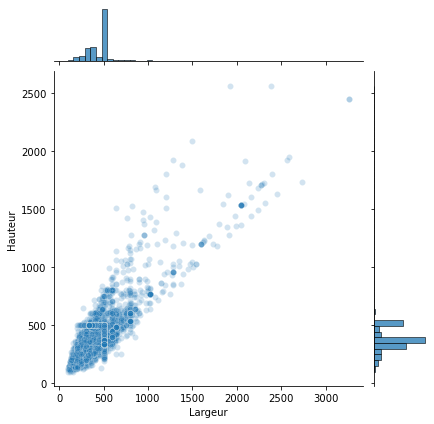

In [14]:
# Distribution des dimensions
sns.jointplot(x=df["Largeur"], y=df["Hauteur"], kind='scatter', marginal_kws=dict(bins=50, fill=True), alpha=0.2)
plt.show()

> Les dimensions les plus communes sont de $500\times375$ (Largeur$\times$Hauteur) et $500\times500$  

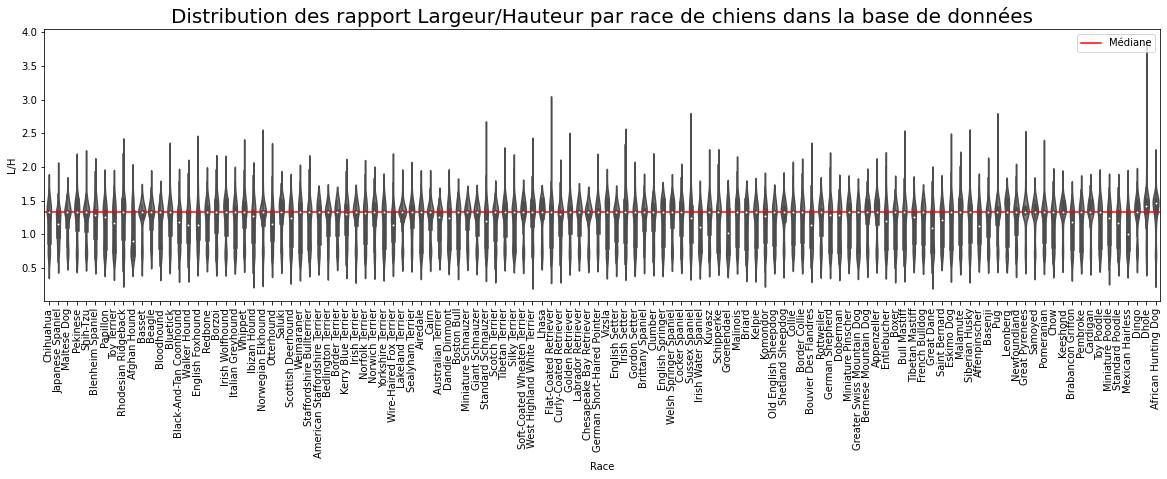

In [15]:
# Distribution des rapport Largeur/Hauteur
fig, ax = plt.subplots(1, 1, figsize=(20,5))
sns.violinplot(x=df["Race"], y=df["L/H"], color="grey", alpha=0.5)
ax.axhline(df["L/H"].median(), c='r', label="Médiane")
ax.set_title("Distribution des rapport Largeur/Hauteur par race de chiens dans la base de données", fontsize=20)
plt.legend()
ax.tick_params(axis='x', rotation=90)
plt.show()

> On peut voir des répartitions de portraits ($L/H\approx0.5$) et paysages ($L/H\approx2$) assez dispersées mais relativement homogènes à travers les différentes classes.

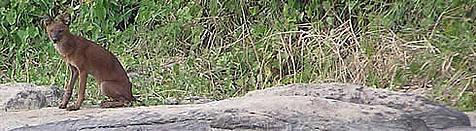

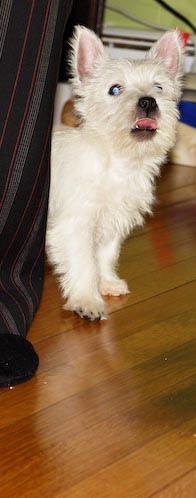

In [16]:
# Aperçu des dimensions extrèmes
extr_addresses = df.sort_values(by=['L/H']).iloc[[-1,0]]['Adresse'].values.tolist()
for address in extr_addresses:
    img = PIL_Image.open(address)
    display(img)

> Des sujets pas forcéments centrés, ni forcéments complets, potentiellement difficiles à traiter par la suite.

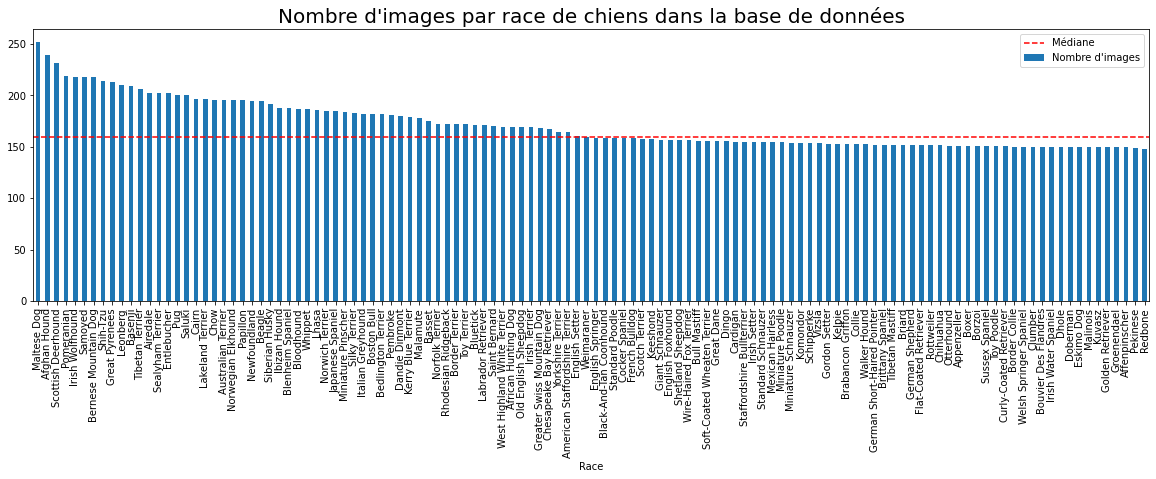

In [17]:
# Nombre d'images par races
df_breeds = pd.DataFrame({"Nombre d'images": df.groupby(['Race'])['Race'].agg('count')})
df_breeds = df_breeds.sort_values(by="Nombre d'images", ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(20,5))
df_breeds.plot(kind="bar", ax=ax)
ax.axhline(df_breeds["Nombre d'images"].median(), c='r', ls='--', label="Médiane")
ax.set_title("Nombre d'images par race de chiens dans la base de données", fontsize=20)
plt.legend()
plt.show()

> Il y a également une bonne distribution d'images pour chaque classe, aucune n'est sous représentée, avec une moyenne de $160$ images.

## Redimensionnement
Contraint par le transfert d'apprentissage, il faut modifier la taille des images pour qu'elles s'adaptent à l'entrée du modèle.  Cela soulagera également le calcul de notre **modèle de zéro**.   

* On a vu plus haut des images aux dimensions variées avec des sujets qui ne sont pas forcément centrés. 
Redimensionner les images aux dimensions voulues risque de fortement les déformer. 
Commençons par tester la transformation sur les deux images précédentes aux proportions extrèmes.

In [20]:
# Chargement des images test
extr_img = []
for address in extr_addresses:
    extr_img.append(cv2.imread(address))

# Redimensionnement avec OpenCV
res_extr_img = [cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR) for img in extr_img]

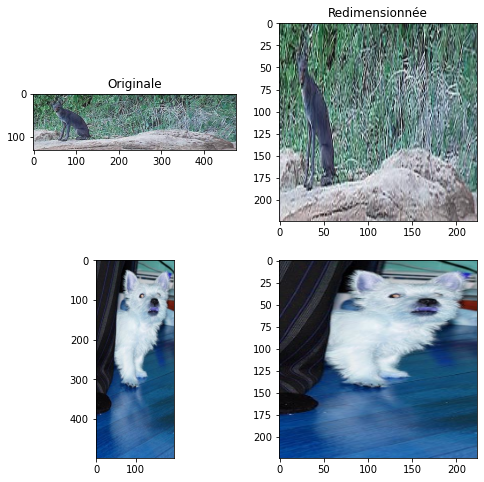

In [21]:
# Figures extrèmes d'origine et redimensionnées
fig, axes = plt.subplots(2,2, figsize=(8,8))
for i in range(2):
    for j, imgs, title in zip(range(2), [extr_img, res_extr_img], ('Originale', 'Redimensionnée')):
        axes[0,j].set_title(title)
        axes[i,j].imshow(imgs[i])
plt.show()

> Comme attendu, les images sont fortement déformées et on peut s'attendre à ce que ce soit également le cas pour d'autres.

## Egalisation
Autre fait, avec un set d'image relativement important, les expositions, contraste, ... sont relativement différents pour chaque image.  
* Utilisons des méthodes basées sur les histogrammes de ces images pour les pré-traiter au mieux.  
Ceux-ci représentent la répartition des pixels selon leur intensité.

* Transformons l'image qui est en **BGR** (Bleu / Vert / Rouge ; par défaut avec OpenCV) dans d'autres systèmes de codages couleurs :
    * **RGB** (Rouge / Vert / Bleu)
    * **YUV** (Y pour la **Luminance** et U/V pour la **Chrominance**)
    * échelle de gris  

In [22]:
# Transformation de l'image avec différent codages couleurs
img_BGR = extr_img[0]
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
img_YUV = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2YUV)
img_GRA = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2GRAY)

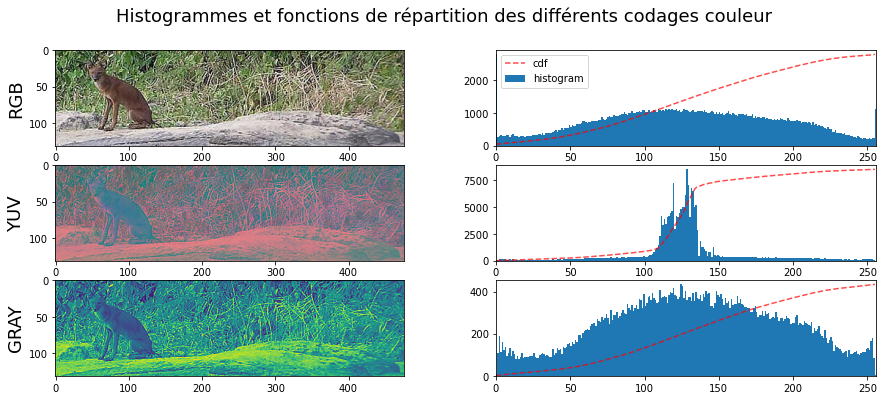

In [25]:
# Histogrammes et fonctions de répartition
fig, axes = plt.subplots(3, 2, figsize=(15,6))
for i, img, title in zip(range(3), [img_RGB, img_YUV, img_GRA], ['RGB', 'YUV', 'GRAY']):
    axes[i,0].imshow(img)
    axes[i,0].set_ylabel(title, fontsize=18)
    axes[i,1].hist(img.flatten(), 256, [0,256])
    axes[i,1].plot(cumulative_distribution(img), color='r', alpha=.7, linestyle='--')
    axes[i,1].set_xlim([0,256])
    axes[0,1].legend(('cdf','histogram'), loc = 'upper left')
fig.suptitle("Histogrammes et fonctions de répartition des différents codages couleur", fontsize=18)
plt.show()

> Il y a des pics localisé au centre des histogrammes.  
Pour une bonne égalisation (amélioration du contraste), il faut répartir la lumière dans tout le spectre de l'image. 

* Utilisons le codage couleur YUV pour agir seulement sur le canal de la luminance (Y) sans modifier la chromiance

In [26]:
# Egalisation
img_YUV[:,:,0] = cv2.equalizeHist(img_YUV[:,:,0])
img_equ = cv2.cvtColor(img_YUV, cv2.COLOR_YUV2RGB)

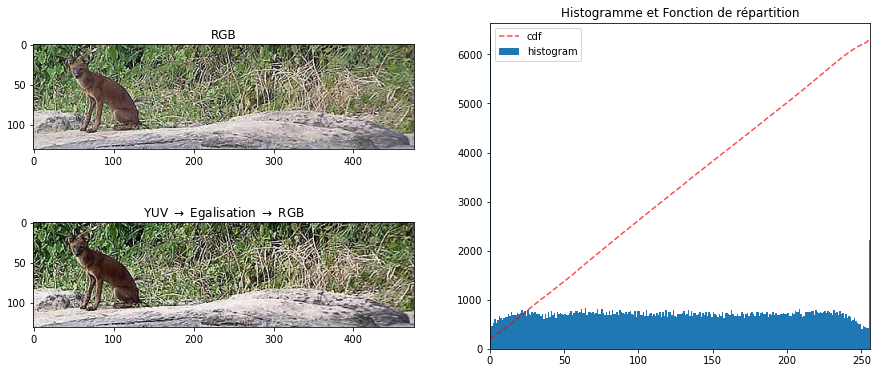

In [27]:
# Histogramme et fonction de répartition
fig = plt.figure(figsize=(15,6))
plt.subplot(2, 2, 1)
plt.title('RGB')
plt.imshow(img_RGB)

plt.subplot(2, 2, 3)
plt.title('YUV $\\rightarrow$ Egalisation $\\rightarrow$ RGB')
plt.imshow(img_equ)

plt.subplot(1, 2, 2)
plt.title('Histogramme et Fonction de répartition')
plt.hist(img_equ.flatten(), 256, [0,256])
plt.plot(cumulative_distribution(img_equ), color='r', alpha=.7, linestyle='--')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlim([0,256])
plt.show()

> On obtient une image bien égalisée avec une fonction de répartition d'apparence linéaire.

## Débruitage
Le bruit dans les images peut compliquer l'apprentissage avec des pixels atypiques pouvant fausser la détection de features. 
Parmis de nombreux types de bruit : caractéristiques de l'appareil photo, compression des images, mauvaise résolution...  
De nombreux filtres permettent de corriger cela, linéaires ou non-linéaires.  
* Utilisons un filtre bien connu pour débruiter : [**non-local means**](https://fr.wikipedia.org/wiki/D%C3%A9bruitage_par_patchs) (débruitage par morceaux).

In [28]:
# Débruitage
img_dnd = cv2.fastNlMeansDenoisingColored(src=img_equ, dst=None, h=10, hColor=10)

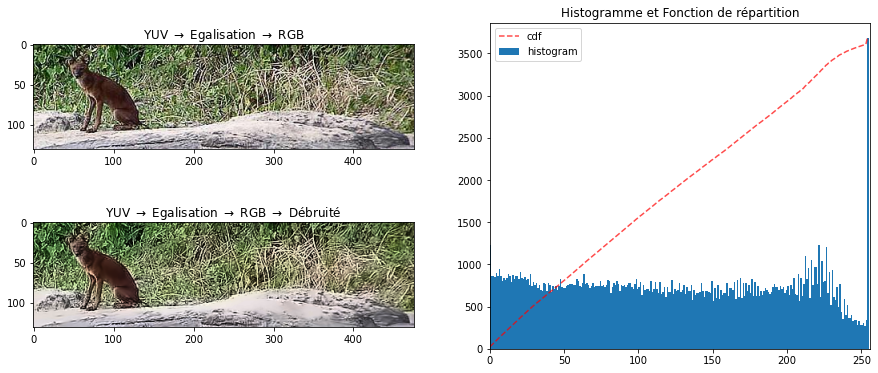

In [29]:
# Histogramme et fonction de répartition
fig = plt.figure(figsize=(15,6))
plt.subplot(2, 2, 1)
plt.title('YUV $\\rightarrow$ Egalisation $\\rightarrow$ RGB')
plt.imshow(img_equ)

plt.subplot(2, 2, 3)
plt.title('YUV $\\rightarrow$ Egalisation $\\rightarrow$ RGB $\\rightarrow$ Débruité')
plt.imshow(img_dnd)

plt.subplot(1, 2, 2)
plt.title('Histogramme et Fonction de répartition')
plt.hist(img_dnd.flatten(), 256, [0,256])
plt.plot(cumulative_distribution(img_dnd), color='r', alpha=.7, linestyle='--')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlim([0,256])
plt.show()

## Augmentation
Pour éviter de risquer de sur-entrainer le modèle avec peu de données ($\approx20.000$), il faut augmenter le nombre d'images par **augmentation**.  
L'objectif est de reproduire les images préexistantes en leur appliquant une **transformation aléatoire**.  
* Utilisons Keras avec sa méthode [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) qui permet de faire à la fois mirroring, rotation, zoom... de manière aléatoire.

In [20]:
# Initialisation
augmented_datagen = kr.preprocessing.image.ImageDataGenerator(
    rotation_range=20,  # 0
    width_shift_range=0.2,  # 0
    height_shift_range=0.2,  # 0
    shear_range=0.2,  # 0
    zoom_range=0.2,  # 0
    horizontal_flip=True)  # False

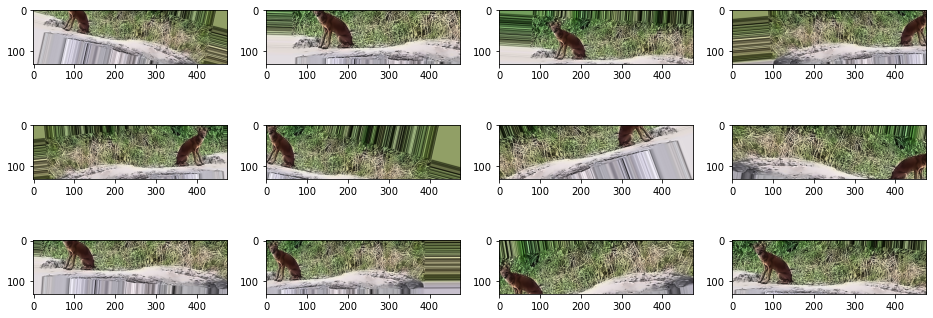

In [21]:
# Génération
fig, axes = plt.subplots(3, 4, figsize=(16,6))
for ax, batch in zip(axes.flatten(), augmented_datagen.flow(img_dnd[None], batch_size=1)):
    ax.imshow(kr.preprocessing.image.array_to_img(batch[0]))

> L'augmentation permet d'avoir des images beaucoup plus variées mais certaines images peuvent causer problèmes.  
Comme celle-ci avec un fort ou faible ratio Hauteur/Largeur et un sujet non centré.  
Cela permet toutefois d'augmenter rapidement notre nombre d'images

---

# Mise en oeuvre

## Prétraitement
* Utilisons tout d'abord la **procédure de prétraitement** cumulant toutes les parties précédentes (excepté l'augmentation) pour retourner un ensemble d'images et étiquettes.

In [76]:
# Prétraitement du lot
try:
    with open('Xyll.pkl', 'rb') as file:
        X,y = pickle.load(file)
        
except:
    # Temps de calcul approximatif : 3minutes
    X, y = preprocessing_lots(df)
    X = np.array(X)
    y = np.array(y)
    print(f"Nombre d'images traitées : {len(y)}")
    print(f"Dimensions de X : {X.shape}")

    # Taille maximale du fichier 3Go
    with open('Xyll.pkl', 'wb') as file:
        pickle.dump([X, y], file)

Nombre d'images traitées : 20580
Dimensions de X : (20580, 224, 224, 3)


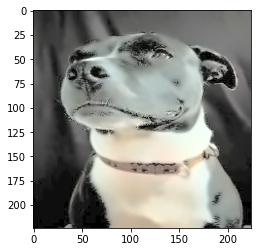

In [45]:
# Exemple
subject = np.random.randint(len(y))
plt.imshow(kr.preprocessing.image.array_to_img(X[subject])); plt.show()

## Initialisation
* Avant de tester sur l'ensemble des 120 races de la base de données, testons tout d'abord un entrainement sur un **sous-ensemble**.  Prenons les 10 races les plus populaire en France en 2020 (selon l'étude de [centrale-canine.fr](https://www.centrale-canine.fr/actualites/lof-2020-les-races-de-chiens-preferees-des-francais)).

In [77]:
top10_breed_list = [
    'Australian Terrier',
    'Staffordshire Bullterrier',
    'Groenendael',
    'Golden Retriever',
    'German Shepherd',
    'American Staffordshire Terrier',
    'Labrador Retriever',
    'Blenheim Spaniel',
    'Beagle',
    'English Setter']

In [78]:
# Sous ensemble
mask = np.isin(y, top10_breed_list)
# mask = np.isin(y, breed_names)
Xm, ym = X[mask], y[mask] ; del X,y
X, y = Xm, ym

* **Brassons** les données, qui sont de base ordonnées, pour réduire la variance en évitant le sur-entrainement

In [79]:
# Mélange
mask = np.arange(len(y))
np.random.seed(42)
np.random.shuffle(mask)
X, y = X[mask], y[mask]

* Convertissons les images $X$ qui sont des valeurs entières en valeurs continues
* Convertissons les cibles $y$ qui sont actuellement textuelles en données numériques avec un simple [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [80]:
# Changement de types
X = X.astype(np.float32)
label_encoder = sk.preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

* Distribution les données entre **jeu d'entrainement** et **jeu de test** en précisant les étiquettes pour la stratification

In [81]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X, y, test_size=test_size, stratify=y)
print(f"Taille du jeu d'entrainement : {len(X_train)}")
print(f"Taille du jeu de test        : {len(X_test)}")
del X, y

Taille du jeu d'entrainement : 1345
Taille du jeu de test        : 337


* Initialisons les **générateurs** d'images pour l'augmentation de données

In [82]:
# Entrainement
train_datagen = kr.preprocessing.image.ImageDataGenerator(
    rescale=1./255,  # None
    rotation_range=15,  # 0
    width_shift_range=0.2,  # 0
    height_shift_range=0.2,  # 0
    shear_range=0.2,  # 0
    zoom_range=0.2,  # 0
    horizontal_flip=True)
train_datagen.fit(X_train)
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

In [83]:
# Test (seulement une mise à l'échelle)
test_datagen = kr.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

* **Early Stop** : Pour prévenir le surapprentissage, on s'arrète après 10 époques si la fonction de perte pour la validation ne diminue plus
* **Learning Rate Reduction** : Le taux d'apprentissage décroit lorsque la fonction de perte n'évolue plus sur 10 époques

In [8]:
earlystop = kr.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
learning_rate_reduction = kr.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    patience=10, 
    verbose=0, 
    factor=0.5, 
    min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

---

# CNN de zéro 1

## Construction
Créons un modèle de réseau de neurones à convolution (CNN: Convolution Neural Network) en imbriquant plusieurs couches :
- Couches de [**Convolution**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) : repére la présence d'un ensemble de **caractéristiques** dans les images reçues en entrée
- Couches de [**Normalisation**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization)
- Couches d'[**Activation ReLU**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation) : remplace les **valeurs négatives** par des zéros par une fonction d'activation
- Couches de **Pooling** ([Max](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) et [Moyenne](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D)) : **réduit la taille** des images tout en préservant leurs caractéristiques importantes
- Couches [**Denses**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) : applique une **combinaison linéaire** puis éventuellement une fonction d'activation
- Couches [**DropOut**](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) : désactive des sorties de neurones aléatoirement pour éviter le **sur-entraînement**

Testons une architecture simple à 3 couches ([Modèle source](https://www.kaggle.com/michaelfumery/computer-vision-cnn-stanford-dogs-dataset/notebook)) qui servira de référence pour la suite

In [89]:
def init_CNNZ1():
    K.clear_session()
    model = kr.models.Sequential([
        kr.layers.Conv2D(input_shape=(*dim, 3), filters=16, kernel_size=(3,3), padding='same', use_bias=False),
        kr.layers.BatchNormalization(axis=3, scale=False),
        kr.layers.Activation('relu'),
        kr.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'),

        kr.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', use_bias=False),
        kr.layers.BatchNormalization(axis=3, scale=False),
        kr.layers.Activation('relu'),
        kr.layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4), padding='same'),
        kr.layers.Dropout(0.2),

        kr.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', use_bias=False),
        kr.layers.BatchNormalization(axis=3, scale=False),
        kr.layers.Activation('relu'),
        kr.layers.GlobalAveragePooling2D(),

        kr.layers.Dense(128, activation='relu'),
        kr.layers.Dense(len(label_encoder.classes_), activation='softmax')
        ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

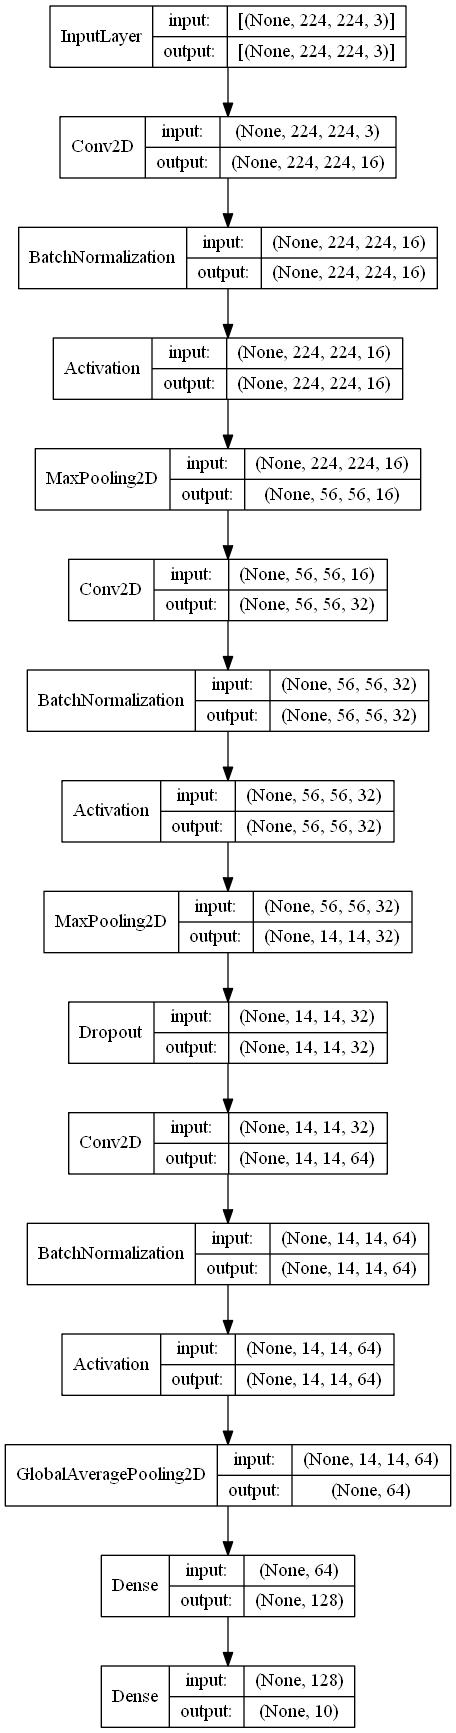

In [18]:
# Visualisation
kr.utils.vis_utils.plot_model(init_CNNZ1(), show_shapes=True, expand_nested=False, show_layer_names=False)

In [19]:
print(f"Nombre total de paramètres : {init_CNNZ1().count_params()}")

Nombre total de paramètres : 33418


## Entrainement

##### Sans Augmentation

In [20]:
%%time
model_zero = init_CNNZ1()
history_zero = model_zero.fit(x=X_train/255., y=y_train, validation_data=(X_test/255., y_test),
    validation_freq=1,
    epochs=epochs,
    callbacks=callbacks,
    verbose=verbose)

Epoch 1/100
43/43 - 9s - loss: 2.2863 - accuracy: 0.1420 - val_loss: 2.3036 - val_accuracy: 0.1128 - lr: 0.0010 - 9s/epoch - 209ms/step
Epoch 2/100
43/43 - 1s - loss: 2.2128 - accuracy: 0.1770 - val_loss: 2.3545 - val_accuracy: 0.1098 - lr: 0.0010 - 909ms/epoch - 21ms/step
Epoch 3/100
43/43 - 1s - loss: 2.1547 - accuracy: 0.2037 - val_loss: 2.4135 - val_accuracy: 0.1157 - lr: 0.0010 - 904ms/epoch - 21ms/step
Epoch 4/100
43/43 - 1s - loss: 2.1269 - accuracy: 0.2268 - val_loss: 2.2857 - val_accuracy: 0.1602 - lr: 0.0010 - 903ms/epoch - 21ms/step
Epoch 5/100
43/43 - 1s - loss: 2.0786 - accuracy: 0.2379 - val_loss: 2.2876 - val_accuracy: 0.1780 - lr: 0.0010 - 898ms/epoch - 21ms/step
Epoch 6/100
43/43 - 1s - loss: 2.0344 - accuracy: 0.2714 - val_loss: 2.2741 - val_accuracy: 0.2166 - lr: 0.0010 - 908ms/epoch - 21ms/step
Epoch 7/100
43/43 - 1s - loss: 2.0076 - accuracy: 0.2669 - val_loss: 2.3619 - val_accuracy: 0.1958 - lr: 0.0010 - 910ms/epoch - 21ms/step
Epoch 8/100
43/43 - 1s - loss: 1.982

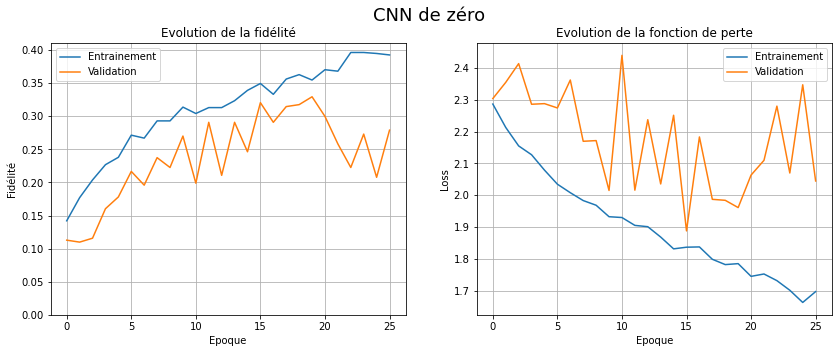

In [21]:
plot_history_scores(history_zero, name='CNN de zéro\n', ymin=0)

In [22]:
y_pred_train = model_zero.predict(X_train/255.).argmax(axis=-1)
y_pred_test = model_zero.predict(X_test/255.).argmax(axis=-1)

In [ ]:
mdf = df_scores(history_zero)
cumulate_scores(mdf, 'CNNZ1')

##### Avec Augmentation

In [92]:
%%time
# ~10 min
model_zero = init_CNNZ1()
history_zero_DA = model_zero.fit(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=len(X_train)//batch_size,
    epochs=60,#epochs,
#     callbacks=callbacks,
    verbose=verbose)

Epoch 1/60
36/36 - 11s - loss: 2.2776 - accuracy: 0.1346 - val_loss: 2.2958 - val_accuracy: 0.1484 - 11s/epoch - 295ms/step
Epoch 2/60
36/36 - 10s - loss: 2.2172 - accuracy: 0.1690 - val_loss: 2.2814 - val_accuracy: 0.1691 - 10s/epoch - 276ms/step
Epoch 3/60
36/36 - 10s - loss: 2.1783 - accuracy: 0.1965 - val_loss: 2.2975 - val_accuracy: 0.1187 - 10s/epoch - 272ms/step
Epoch 4/60
36/36 - 10s - loss: 2.1283 - accuracy: 0.2347 - val_loss: 2.3657 - val_accuracy: 0.1217 - 10s/epoch - 277ms/step
Epoch 5/60
36/36 - 10s - loss: 2.0865 - accuracy: 0.2324 - val_loss: 2.3385 - val_accuracy: 0.1602 - 10s/epoch - 275ms/step
Epoch 6/60
36/36 - 10s - loss: 2.0880 - accuracy: 0.2278 - val_loss: 2.3537 - val_accuracy: 0.1632 - 10s/epoch - 291ms/step
Epoch 7/60
36/36 - 10s - loss: 2.0532 - accuracy: 0.2531 - val_loss: 2.3379 - val_accuracy: 0.1691 - 10s/epoch - 289ms/step
Epoch 8/60
36/36 - 10s - loss: 2.0290 - accuracy: 0.2676 - val_loss: 2.3557 - val_accuracy: 0.1691 - 10s/epoch - 273ms/step
Epoch 9/

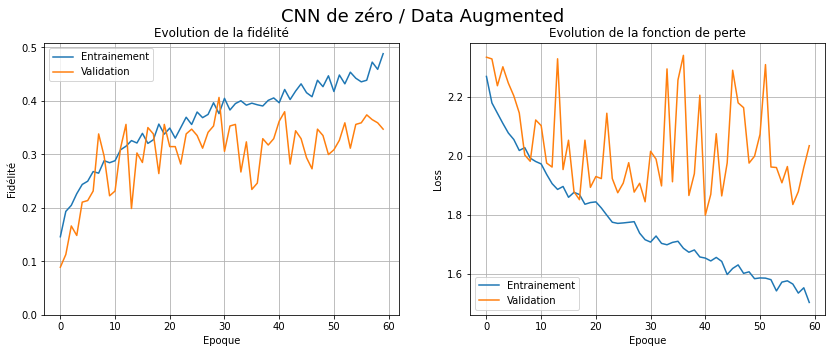

In [51]:
plot_history_scores(history_zero_DA, name='CNN de zéro / Data Augmented\n', ymin=0)

In [317]:
y_pred_train = model_zero.predict(X_train/255.).argmax(axis=-1)
y_pred_test = model_zero.predict(X_test/255.).argmax(axis=-1)

In [321]:
mdf = df_scores(history_zero_DA)
cumulate_scores(mdf, 'CNNZ1/DA')

> Ici l'aumgentation de données permet de gagner légerement en fidélité (~$15$%)

---

# CNN de zéro 2

## Construction
* Créons un modèle de réseau de neurones à convolutionde d'architecture de type [AlexNet](https://www.kaggle.com/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner)  
![](https://miro.medium.com/max/2000/1*2DT1bjmvC-U-lrL7tpj6wg.png)

In [49]:
# AlexNet
def init_CNNZ2():
    K.clear_session()
    model = kr.models.Sequential([    
        kr.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(*dim,3)),
        kr.layers.BatchNormalization(),
        kr.layers.MaxPool2D(pool_size=(2,2)),

        kr.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
        kr.layers.BatchNormalization(),
        kr.layers.MaxPool2D(pool_size=(3,3)),

        kr.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
        kr.layers.BatchNormalization(),

        kr.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
        kr.layers.BatchNormalization(),

        kr.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
        kr.layers.BatchNormalization(),
        kr.layers.MaxPool2D(pool_size=(2,2)),

        kr.layers.Flatten(),
        kr.layers.Dense(1024,activation='relu'),
        kr.layers.Dropout(0.5),
        kr.layers.Dense(1024,activation='relu'),
        kr.layers.Dropout(0.5),
        kr.layers.Dense(len(label_encoder.classes_),activation='softmax')  
        ])
    model.compile(optimizer=tf.optimizers.SGD(lr=0.005), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

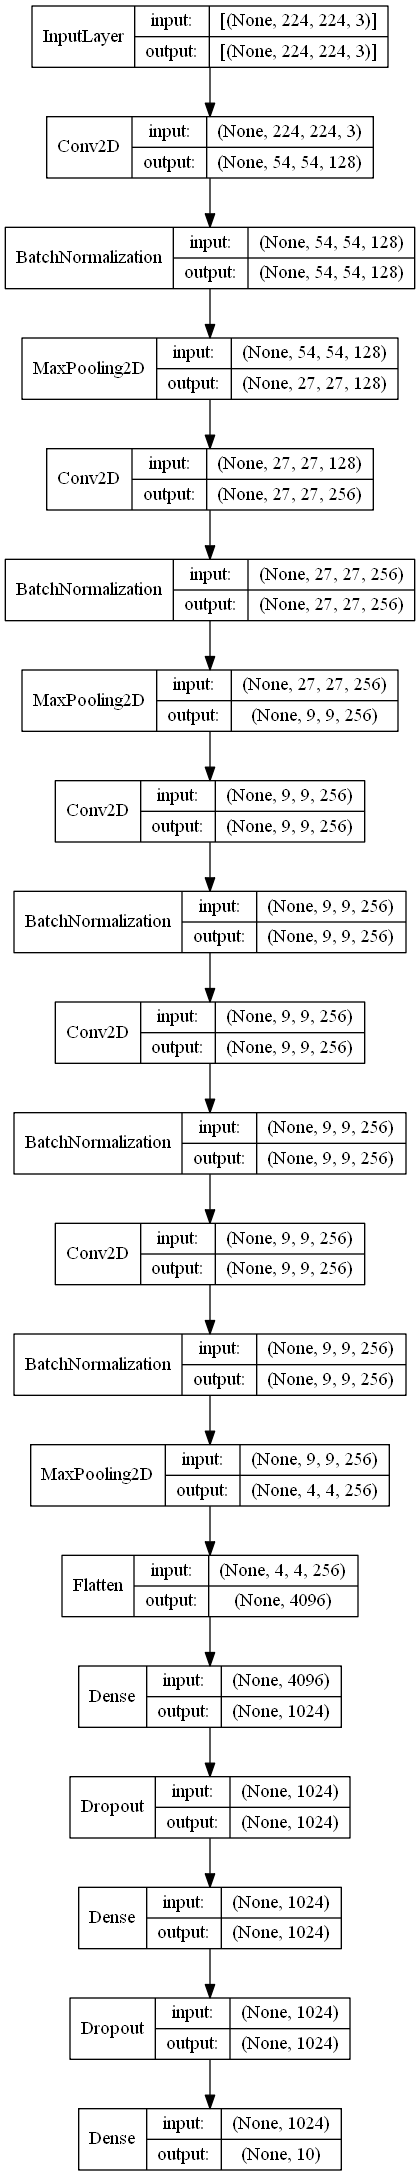

In [74]:
# Visualisation
kr.utils.vis_utils.plot_model(init_CNNZ2(), show_shapes=True, expand_nested=False, show_layer_names=False)

In [161]:
print(f"Nombre total de paramètres : {init_CNNZ2().count_params()}")

Nombre total de paramètres : 6847498


## Entrainement

##### Sans Augmentation

In [50]:
%%time
model_zero2 = init_CNNZ2()
history_zero2 = model_zero2.fit(x=X_train/255., y=y_train, validation_data=(X_test/255., y_test),
    validation_freq=1,
    epochs=epochs,
    callbacks=callbacks,
    verbose=verbose)

Epoch 1/100
43/43 - 2s - loss: 3.4603 - accuracy: 0.1160 - val_loss: 2.4297 - val_accuracy: 0.0920 - lr: 0.0050 - 2s/epoch - 42ms/step
Epoch 2/100
43/43 - 1s - loss: 2.9039 - accuracy: 0.1472 - val_loss: 2.3038 - val_accuracy: 0.1068 - lr: 0.0050 - 1s/epoch - 24ms/step
Epoch 3/100
43/43 - 1s - loss: 2.6156 - accuracy: 0.1755 - val_loss: 2.2497 - val_accuracy: 0.1068 - lr: 0.0050 - 1s/epoch - 24ms/step
Epoch 4/100
43/43 - 1s - loss: 2.4355 - accuracy: 0.1866 - val_loss: 2.1434 - val_accuracy: 0.2433 - lr: 0.0050 - 995ms/epoch - 23ms/step
Epoch 5/100
43/43 - 1s - loss: 2.2514 - accuracy: 0.2268 - val_loss: 2.1498 - val_accuracy: 0.1869 - lr: 0.0050 - 1s/epoch - 23ms/step
Epoch 6/100
43/43 - 1s - loss: 2.2105 - accuracy: 0.2223 - val_loss: 2.1178 - val_accuracy: 0.2047 - lr: 0.0050 - 1s/epoch - 23ms/step
Epoch 7/100
43/43 - 1s - loss: 2.1257 - accuracy: 0.2416 - val_loss: 2.0552 - val_accuracy: 0.2789 - lr: 0.0050 - 1s/epoch - 23ms/step
Epoch 8/100
43/43 - 1s - loss: 2.0346 - accuracy: 0.

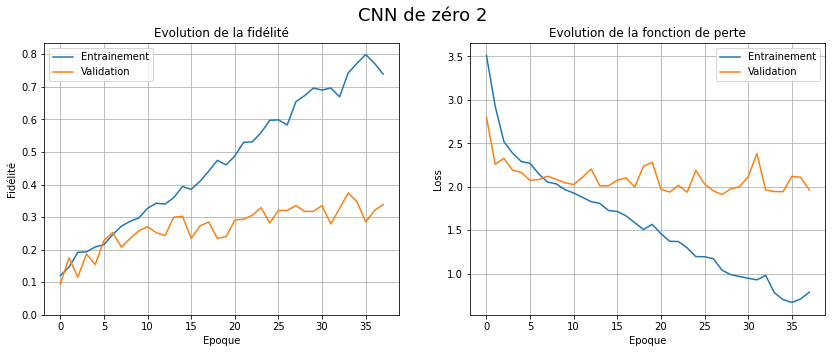

In [41]:
plot_history_scores(history_zero2, name='CNN de zéro 2\n', ymin=0)

In [51]:
y_pred_train = model_zero2.predict(X_train/255.).argmax(axis=-1)
y_pred_test = model_zero2.predict(X_test/255.).argmax(axis=-1)

In [53]:
mdf = df_scores(history_zero2)
cumulate_scores(mdf, 'CNNZ2')

##### Avec Augmentation

In [44]:
%%time
# ~ 18 min
model_zero2 = init_CNNZ2()
history_zero2_DA = model_zero2.fit(
    train_generator,
    validation_data=test_generator,
    steps_per_epoch=len(X_train)//batch_size,
    epochs=2*epochs,
    callbacks=callbacks,
    verbose=verbose)

Epoch 1/200
84/84 - 14s - loss: 3.4597 - accuracy: 0.1205 - val_loss: 2.2837 - val_accuracy: 0.1454 - lr: 0.0050 - 14s/epoch - 166ms/step
Epoch 2/200
84/84 - 12s - loss: 2.7501 - accuracy: 0.1354 - val_loss: 2.1797 - val_accuracy: 0.2166 - lr: 0.0050 - 12s/epoch - 145ms/step
Epoch 3/200
84/84 - 12s - loss: 2.5233 - accuracy: 0.1460 - val_loss: 2.1550 - val_accuracy: 0.2018 - lr: 0.0050 - 12s/epoch - 142ms/step
Epoch 4/200
84/84 - 12s - loss: 2.4563 - accuracy: 0.1400 - val_loss: 2.1187 - val_accuracy: 0.2196 - lr: 0.0050 - 12s/epoch - 141ms/step
Epoch 5/200
84/84 - 12s - loss: 2.3812 - accuracy: 0.1543 - val_loss: 2.1184 - val_accuracy: 0.2582 - lr: 0.0050 - 12s/epoch - 141ms/step
Epoch 6/200
84/84 - 12s - loss: 2.3488 - accuracy: 0.1437 - val_loss: 2.1228 - val_accuracy: 0.2404 - lr: 0.0050 - 12s/epoch - 140ms/step
Epoch 7/200
84/84 - 12s - loss: 2.3381 - accuracy: 0.1505 - val_loss: 2.0948 - val_accuracy: 0.2522 - lr: 0.0050 - 12s/epoch - 141ms/step
Epoch 8/200
84/84 - 12s - loss: 2.

84/84 - 11s - loss: 1.8600 - accuracy: 0.3318 - val_loss: 1.7286 - val_accuracy: 0.3887 - lr: 0.0050 - 11s/epoch - 129ms/step
Epoch 61/200
84/84 - 11s - loss: 1.8411 - accuracy: 0.3431 - val_loss: 1.7580 - val_accuracy: 0.3650 - lr: 0.0050 - 11s/epoch - 128ms/step
Epoch 62/200
84/84 - 11s - loss: 1.8542 - accuracy: 0.3356 - val_loss: 1.8164 - val_accuracy: 0.3323 - lr: 0.0050 - 11s/epoch - 129ms/step
Epoch 63/200
84/84 - 11s - loss: 1.8399 - accuracy: 0.3504 - val_loss: 1.7789 - val_accuracy: 0.3501 - lr: 0.0050 - 11s/epoch - 130ms/step
Epoch 64/200
84/84 - 11s - loss: 1.7951 - accuracy: 0.3717 - val_loss: 1.7285 - val_accuracy: 0.3947 - lr: 0.0050 - 11s/epoch - 130ms/step
Epoch 65/200
84/84 - 11s - loss: 1.8154 - accuracy: 0.3506 - val_loss: 1.7189 - val_accuracy: 0.3947 - lr: 0.0050 - 11s/epoch - 130ms/step
Wall time: 12min 14s


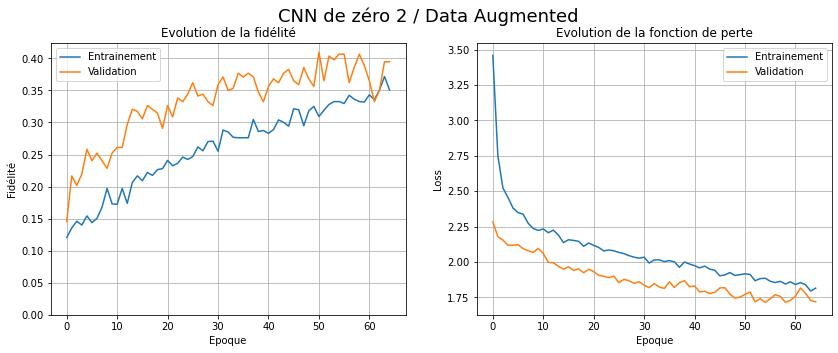

In [45]:
plot_history_scores(history_zero2_DA, name='CNN de zéro 2 / Data Augmented\n', ymin=0)

In [46]:
y_pred_train = model_zero2.predict(X_train/255.).argmax(axis=-1)
y_pred_test = model_zero2.predict(X_test/255.).argmax(axis=-1)

In [47]:
mdf = df_scores(history_zero2_DA)
cumulate_scores(mdf, 'CNNZ2/DA')

> Ici l'augmentation de données est plus efficace et permet un gain de fidélité de ~$33$%.  
Cependant pour ces deux modèles implémentés, les résultats sont assez faibles.

---

# Rechargement

In [64]:
# Seulement les 10 premières races
try:
    with open('Xy_nontraité.pkl', 'rb') as file:
        X_train, X_test, y_train, y_test, label_encoder = pickle.load(file)
        
except:        
    def loading_images(df):
        img_list, labels = [], []
        for index, address, breed in zip(df.index, df['Adresse'], df['Race']):
            img = cv2.imread(address)
            res_img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR) 
            img_list.append(res_img)
            labels.append(breed)
        return img_list, labels

    X, y = loading_images(df[df['Race'].isin(top10_breed_list)])   # !!!!!!!!!!!!!!!!!
    X = np.array(X)
    y = np.array(y)
    
    mask = np.arange(len(y))
    np.random.seed(42)
    np.random.shuffle(mask)
    X, y = X[mask], y[mask]
    X = X.astype(np.float32)

    label_encoder = sk.preprocessing.LabelEncoder()
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
        X, y, test_size=test_size, stratify=y)
    del X, y

    # Taille maximale du fichier 12Go
    with open('Xy_nontraité.pkl', 'wb') as file:
        pickle.dump([X_train, X_test, y_train, y_test, label_encoder], file)
        
print(f"Taille du jeu d'entrainement : {len(X_train)}")
print(f"Taille du jeu de test        : {len(X_test)}")

Taille du jeu d'entrainement : 1345
Taille du jeu de test        : 337


In [85]:
# Entrainement
train_datagen = kr.preprocessing.image.ImageDataGenerator(
    rotation_range=15,  # 0
    width_shift_range=0.2,  # 0
    height_shift_range=0.2,  # 0
    shear_range=0.2,  # 0
    zoom_range=0.2,  # 0
    horizontal_flip=True,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
train_generator_TL = train_datagen.flow(X_train, y_train, batch_size=batch_size)

In [86]:
# Test (seulement une mise à l'échelle)
test_datagen = kr.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
test_generator_TL = test_datagen.flow(X_test, y_test, batch_size=batch_size)

# Transfer Learning (FE)
Testons alors le transfer learning pour améliorer les performance en utilisant des modèles déjà entrainé à détecter les caractéristiques sur un nombre important d'image. Notre jeu de données étant petit et relativement similaire au dataset original, si nous entrainons le réseau complet, nous risquons de rencontrer des problèmes d'over-fitting.

* Une première stratégie est de ne réappendre que les couches denses du classifieur
* Utilisons le modèle [MobileNetV2](https://arxiv.org/pdf/1801.04381.pdf)

## Construction
* Chargeons le modèle de base pré-entrainé mais sans les dernières couches
* Il est également nécessaire de modifier les générateurs pour y intégrer le `preprocess_input` MobileNetV2 recommandé par Keras

In [87]:
def init_TL_FE():
    K.clear_session()
    
    # Transfer du modèle
    model = kr.applications.mobilenet_v2.MobileNetV2(
        weights='imagenet',
        include_top=False, 
        pooling='avg',
        input_shape=(*dim,3))
    
    # Gel du premier bloc
    for layer in model.layers:
        layer.trainable = False
        
    # Ajout du second bloc fully-connected
    base_output = model.output
    base_output = kr.layers.Dense(128, activation='relu')(base_output)
    base_output = kr.layers.Dropout(0.2)(base_output)
    predictions = kr.layers.Dense(len(label_encoder.classes_), activation='softmax')(base_output)

    # Definition du nouveau model
    model = kr.models.Model(inputs=model.input, outputs=predictions)
    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.0001), 
        loss="sparse_categorical_crossentropy", 
        metrics=["accuracy"])
    return model

In [ ]:
# Visualisation
kr.utils.vis_utils.plot_model(init_TL_FE(), show_shapes=True, expand_nested=False, show_layer_names=False)

In [223]:
print(f"Nombre total de paramètres : {init_TL_FE().count_params()}")

Nombre total de paramètres : 2423242


## Entrainement

###### Sans Augmentation

In [224]:
%%time
model_extrac = init_TL_FE()
history_extract = model_extrac.fit(x=X_train/255., y=y_train, validation_data=(X_test/255., y_test),
    validation_freq=1,
    epochs=epochs,
    callbacks=callbacks,
    verbose=verbose)

Epoch 1/100
43/43 - 4s - loss: 2.1374 - accuracy: 0.2461 - val_loss: 1.7042 - val_accuracy: 0.4748 - lr: 1.0000e-04 - 4s/epoch - 96ms/step
Epoch 2/100
43/43 - 2s - loss: 1.5223 - accuracy: 0.5152 - val_loss: 1.3129 - val_accuracy: 0.6350 - lr: 1.0000e-04 - 2s/epoch - 38ms/step
Epoch 3/100
43/43 - 2s - loss: 1.2019 - accuracy: 0.6260 - val_loss: 1.0737 - val_accuracy: 0.6825 - lr: 1.0000e-04 - 2s/epoch - 38ms/step
Epoch 4/100
43/43 - 2s - loss: 0.9758 - accuracy: 0.7026 - val_loss: 0.9229 - val_accuracy: 0.7151 - lr: 1.0000e-04 - 2s/epoch - 38ms/step
Epoch 5/100
43/43 - 2s - loss: 0.8512 - accuracy: 0.7309 - val_loss: 0.8549 - val_accuracy: 0.7240 - lr: 1.0000e-04 - 2s/epoch - 37ms/step
Epoch 6/100
43/43 - 2s - loss: 0.7520 - accuracy: 0.7606 - val_loss: 0.7846 - val_accuracy: 0.7389 - lr: 1.0000e-04 - 2s/epoch - 38ms/step
Epoch 7/100
43/43 - 2s - loss: 0.7039 - accuracy: 0.7591 - val_loss: 0.7613 - val_accuracy: 0.7270 - lr: 1.0000e-04 - 2s/epoch - 38ms/step
Epoch 8/100
43/43 - 2s - lo

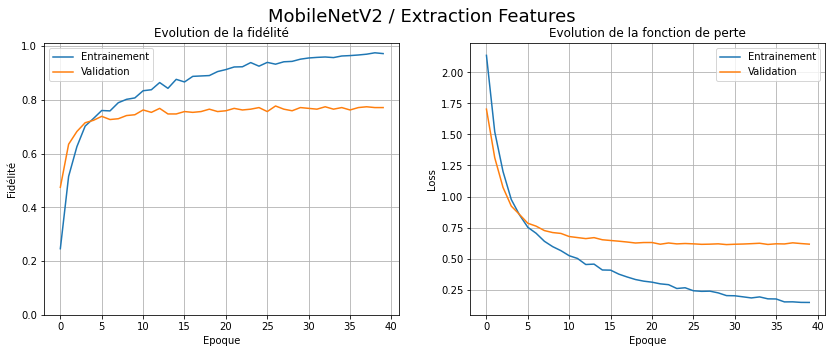

In [225]:
# AVEC DENOISING
plot_history_scores(history_extract, name='MobileNetV2 / Extraction Features\n', ymin=0)

In [88]:
%%time
model_extrac = init_TL_FE()
history_extract = model_extrac.fit(x=X_train/255., y=y_train, validation_data=(X_test/255., y_test),
    validation_freq=1,
    epochs=epochs,
    callbacks=callbacks,
    verbose=verbose)

Epoch 1/100
43/43 - 4s - loss: 2.0346 - accuracy: 0.3152 - val_loss: 1.3955 - val_accuracy: 0.7151 - lr: 1.0000e-04 - 4s/epoch - 100ms/step
Epoch 2/100
43/43 - 2s - loss: 1.1409 - accuracy: 0.7108 - val_loss: 0.8378 - val_accuracy: 0.8309 - lr: 1.0000e-04 - 2s/epoch - 38ms/step
Epoch 3/100
43/43 - 2s - loss: 0.7287 - accuracy: 0.8216 - val_loss: 0.6035 - val_accuracy: 0.8457 - lr: 1.0000e-04 - 2s/epoch - 37ms/step
Epoch 4/100
43/43 - 2s - loss: 0.5687 - accuracy: 0.8424 - val_loss: 0.4932 - val_accuracy: 0.8813 - lr: 1.0000e-04 - 2s/epoch - 37ms/step
Epoch 5/100
43/43 - 2s - loss: 0.4760 - accuracy: 0.8572 - val_loss: 0.4353 - val_accuracy: 0.8783 - lr: 1.0000e-04 - 2s/epoch - 37ms/step
Epoch 6/100
43/43 - 2s - loss: 0.4089 - accuracy: 0.8729 - val_loss: 0.3944 - val_accuracy: 0.8843 - lr: 1.0000e-04 - 2s/epoch - 37ms/step
Epoch 7/100
43/43 - 2s - loss: 0.3614 - accuracy: 0.8937 - val_loss: 0.3708 - val_accuracy: 0.8902 - lr: 1.0000e-04 - 2s/epoch - 37ms/step
Epoch 8/100
43/43 - 2s - l

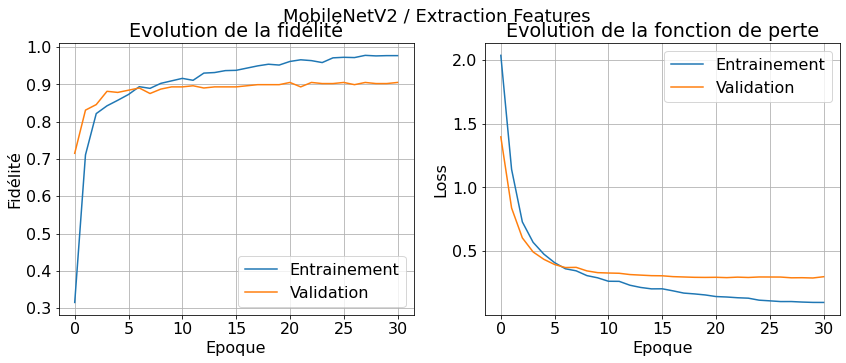

In [90]:
plot_history_scores(history_extract, name='MobileNetV2 / Extraction Features\n')

In [226]:
y_pred_train = model_extrac.predict(X_train/255.).argmax(axis=-1)
y_pred_test = model_extrac.predict(X_test/255.).argmax(axis=-1)

In [227]:
mdf = df_scores(history_extract)
cumulate_scores(mdf, 'TLFE')

###### Avec Augmentation

In [91]:
%%time
# ~5 min
model_extrac = init_TL_FE()
history_extract_DA = model_extrac.fit(
    train_generator_TL,
    validation_data=test_generator_TL,
    steps_per_epoch=len(X_train)//batch_size,
    epochs=2*epochs,
    callbacks=callbacks,
    verbose=verbose)

Epoch 1/200
36/36 - 14s - loss: 2.1065 - accuracy: 0.2829 - val_loss: 1.4278 - val_accuracy: 0.6736 - lr: 1.0000e-04 - 14s/epoch - 380ms/step
Epoch 2/200
36/36 - 11s - loss: 1.2159 - accuracy: 0.6919 - val_loss: 0.8420 - val_accuracy: 0.8338 - lr: 1.0000e-04 - 11s/epoch - 293ms/step
Epoch 3/200
36/36 - 11s - loss: 0.8075 - accuracy: 0.7890 - val_loss: 0.5727 - val_accuracy: 0.8694 - lr: 1.0000e-04 - 11s/epoch - 301ms/step
Epoch 4/200
36/36 - 11s - loss: 0.6167 - accuracy: 0.8295 - val_loss: 0.4456 - val_accuracy: 0.8783 - lr: 1.0000e-04 - 11s/epoch - 300ms/step
Epoch 5/200
36/36 - 11s - loss: 0.5202 - accuracy: 0.8410 - val_loss: 0.3873 - val_accuracy: 0.8754 - lr: 1.0000e-04 - 11s/epoch - 298ms/step
Epoch 6/200
36/36 - 11s - loss: 0.4528 - accuracy: 0.8616 - val_loss: 0.3479 - val_accuracy: 0.8724 - lr: 1.0000e-04 - 11s/epoch - 294ms/step
Epoch 7/200
36/36 - 11s - loss: 0.4154 - accuracy: 0.8647 - val_loss: 0.3228 - val_accuracy: 0.8872 - lr: 1.0000e-04 - 11s/epoch - 295ms/step
Epoch 

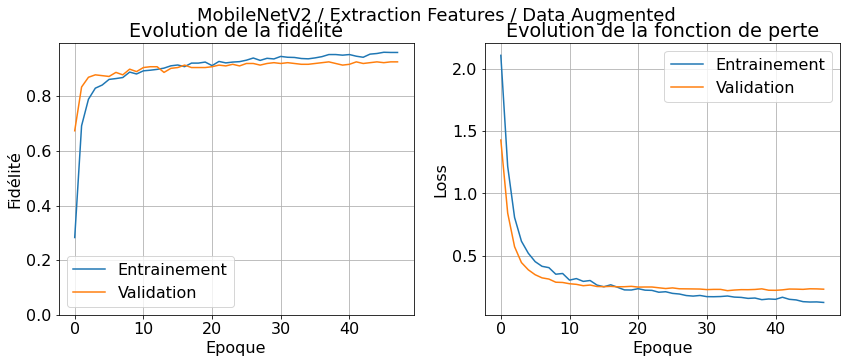

In [92]:
plot_history_scores(history_extract_DA, name='MobileNetV2 / Extraction Features / Data Augmented\n', ymin=0)

In [ ]:
y_pred_train = model_extrac.predict(tf.keras.applications.mobilenet_v2.preprocess_input(X_train)).argmax(axis=-1)
y_pred_test = model_extrac.predict(tf.keras.applications.mobilenet_v2.preprocess_input(X_test)).argmax(axis=-1)

In [ ]:
rdf.drop(index='TLFE/DA', inplace=True)

In [ ]:
mdf = df_scores(history_extract_DA)
cumulate_scores(mdf, 'TLFE/DA')

# Tranfert Learning (RP)

## Construction
* Chargeons le modèle de base pré-entrainé de Keras mais sans les dernières couches

Notre jeu de données est petit et relativement similaire au dataset original. Si nous entrainons le réseau complet, nous risquons de rencontrer des problèmes d'over-fitting. Nous allons donc "geler" tous les laye!!!!!!!!!!!!!!!!!!  

On remarque dans les layers importés du modèle que la dernière couche importée est une couche `GlobalAveragePooling2D`. Nous allons donc **ajouter une couche complétement connectée, un DropOut et enfin le classifier** dans un nouveau modèle :# <span style="color:#343434" id="section_1">1. Preprocessing des images</span>

Il est également nécessaire de modifier les générateurs pour y **intégrer le `preprocess_input` Xception** recommandé par Keras :

In [14]:
def init_TL_RP():
    K.clear_session()
    
    # Transfer du modèle
    model = kr.applications.mobilenet_v2.MobileNetV2(
        weights='imagenet',
        include_top=False, 
        pooling='avg',
        input_shape=(*dim,3))
    
    # Gel du premier bloc
    for layer in model.layers[:-5]:  # BN, C2D, BN, ReLU, GAP2D
        layer.trainable = False
        
    # Ajout du second bloc fully-connected
    base_output = model.output
    base_output = kr.layers.Dense(128, activation='relu')(base_output)
    base_output = kr.layers.Dropout(0.2)(base_output)
    predictions = kr.layers.Dense(len(label_encoder.classes_), activation='softmax')(base_output)

    # Definition du nouveau model
    model = kr.models.Model(inputs=model.input, outputs=predictions)
    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.0001), 
        loss="sparse_categorical_crossentropy", 
        metrics=["accuracy"])
    return model

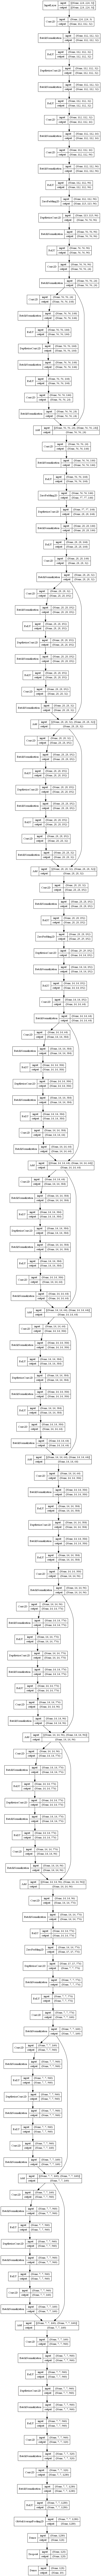

In [211]:
# Visualisation
kr.utils.vis_utils.plot_model(init_TL_RP(), show_shapes=True, expand_nested=False, show_layer_names=False)

In [248]:
print(f"Nombre totla de paramètres : {init_TL_RP().count_params()}")

Nombre totla de paramètres : 2423242


## Entrainement

###### Sans Augmentation

In [249]:
%%time
model_partial = init_TL_RP()
history_partial = model_partial.fit(x=X_train/255., y=y_train, validation_data=(X_test/255., y_test),
    validation_freq=1,
    epochs=epochs,
    callbacks=callbacks,
    verbose=verbose)

Epoch 1/100
43/43 - 4s - loss: 1.7326 - accuracy: 0.4208 - val_loss: 1.0831 - val_accuracy: 0.6706 - lr: 1.0000e-04 - 4s/epoch - 101ms/step
Epoch 2/100
43/43 - 2s - loss: 0.9218 - accuracy: 0.7167 - val_loss: 0.8252 - val_accuracy: 0.7240 - lr: 1.0000e-04 - 2s/epoch - 38ms/step
Epoch 3/100
43/43 - 2s - loss: 0.6833 - accuracy: 0.7948 - val_loss: 0.7367 - val_accuracy: 0.7507 - lr: 1.0000e-04 - 2s/epoch - 39ms/step
Epoch 4/100
43/43 - 2s - loss: 0.5707 - accuracy: 0.8238 - val_loss: 0.7273 - val_accuracy: 0.7300 - lr: 1.0000e-04 - 2s/epoch - 39ms/step
Epoch 5/100
43/43 - 2s - loss: 0.4438 - accuracy: 0.8743 - val_loss: 0.7037 - val_accuracy: 0.7418 - lr: 1.0000e-04 - 2s/epoch - 40ms/step
Epoch 6/100
43/43 - 2s - loss: 0.3756 - accuracy: 0.8922 - val_loss: 0.7076 - val_accuracy: 0.7478 - lr: 1.0000e-04 - 2s/epoch - 39ms/step
Epoch 7/100
43/43 - 2s - loss: 0.3303 - accuracy: 0.9108 - val_loss: 0.6643 - val_accuracy: 0.7715 - lr: 1.0000e-04 - 2s/epoch - 39ms/step
Epoch 8/100
43/43 - 2s - l

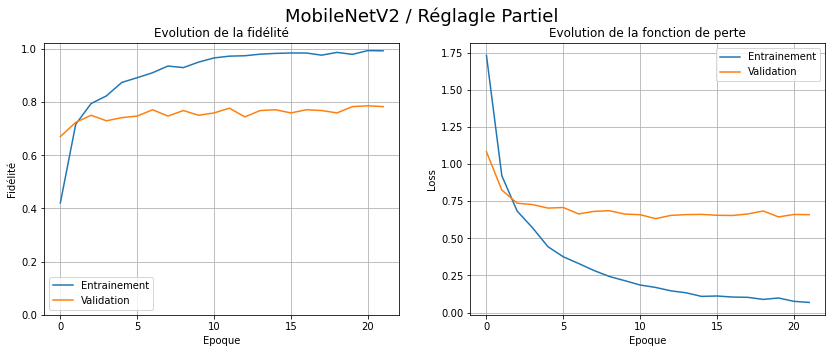

In [250]:
plot_history_scores(history_partial, name='MobileNetV2 / Réglagle Partiel\n', ymin=0)

In [251]:
y_pred_train = model_partial.predict(X_train/255.).argmax(axis=-1)
y_pred_test = model_partial.predict(X_test/255.).argmax(axis=-1)

In [252]:
mdf = df_scores(history_partial)
cumulate_scores(mdf, 'TLRP')

###### Avec Augmentation

In [31]:
%%time
# ~5 min
model_partial = init_TL_RP()
history_partial_DA = model_partial.fit(
    train_generator_TL,
    validation_data=test_generator_TL,
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs,
    callbacks=callbacks,
    verbose=verbose)

Epoch 1/100
36/36 - 13s - loss: 1.5247 - accuracy: 0.5375 - val_loss: 0.6693 - val_accuracy: 0.8309 - lr: 1.0000e-04 - 13s/epoch - 375ms/step
Epoch 2/100
36/36 - 10s - loss: 0.6684 - accuracy: 0.7974 - val_loss: 0.4013 - val_accuracy: 0.8783 - lr: 1.0000e-04 - 10s/epoch - 290ms/step
Epoch 3/100
36/36 - 10s - loss: 0.4892 - accuracy: 0.8456 - val_loss: 0.3521 - val_accuracy: 0.8783 - lr: 1.0000e-04 - 10s/epoch - 289ms/step
Epoch 4/100
36/36 - 10s - loss: 0.4027 - accuracy: 0.8662 - val_loss: 0.3114 - val_accuracy: 0.8902 - lr: 1.0000e-04 - 10s/epoch - 287ms/step
Epoch 5/100
36/36 - 10s - loss: 0.3695 - accuracy: 0.8769 - val_loss: 0.2993 - val_accuracy: 0.8961 - lr: 1.0000e-04 - 10s/epoch - 287ms/step
Epoch 6/100
36/36 - 10s - loss: 0.3290 - accuracy: 0.8907 - val_loss: 0.2866 - val_accuracy: 0.8961 - lr: 1.0000e-04 - 10s/epoch - 286ms/step
Epoch 7/100
36/36 - 10s - loss: 0.3013 - accuracy: 0.8876 - val_loss: 0.2826 - val_accuracy: 0.9080 - lr: 1.0000e-04 - 10s/epoch - 290ms/step
Epoch 

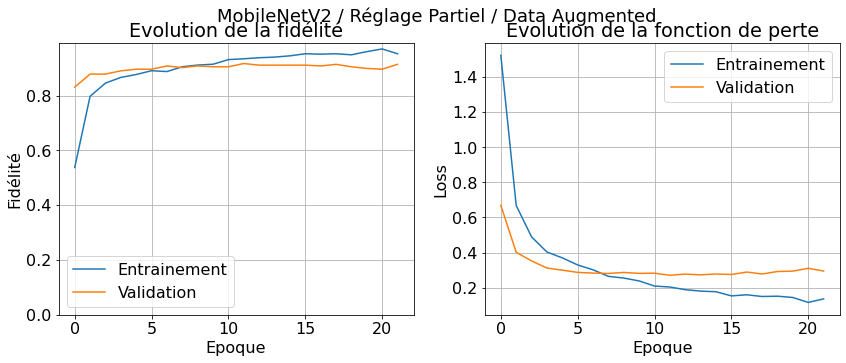

In [32]:
plot_history_scores(history_partial_DA, name='MobileNetV2 / Réglage Partiel / Data Augmented\n', ymin=0)

In [52]:
y_pred_train = model_partial.predict(tf.keras.applications.mobilenet_v2.preprocess_input(X_train)).argmax(axis=-1)
y_pred_test = model_partial.predict(tf.keras.applications.mobilenet_v2.preprocess_input(X_test)).argmax(axis=-1)

In [55]:
mdf = df_scores(history_partial_DA)
cumulate_scores(mdf, 'TLRP/DA')

> On voit très bien ici que les métriques du modèle ...... sur nos données sont bien meilleures que le modèle "from scratch" quand les couches profondes ne sont pas entrainées. D'autre part, le modèle apprend très vite et l'accuracy augmente rapidement *(tout comme la perte diminue)*. Comparons les 2 modèles : !:!!!!!!!!!!!!!!!!

---

# Comparatif
* Accuracy pour MobileNetV2 :
    * Top-1 : $0.713$
    * Top-5 : $0.901$

In [37]:
# rdf.to_pickle('results.pkl')
rdf = pd.read_pickle('results.pkl')

In [38]:
# rdf.index.names = ['Modèle','Jeu']
fdf = rdf.reset_index().sort_values(by=['Modèle', 'Jeu'], ascending=[True,False])

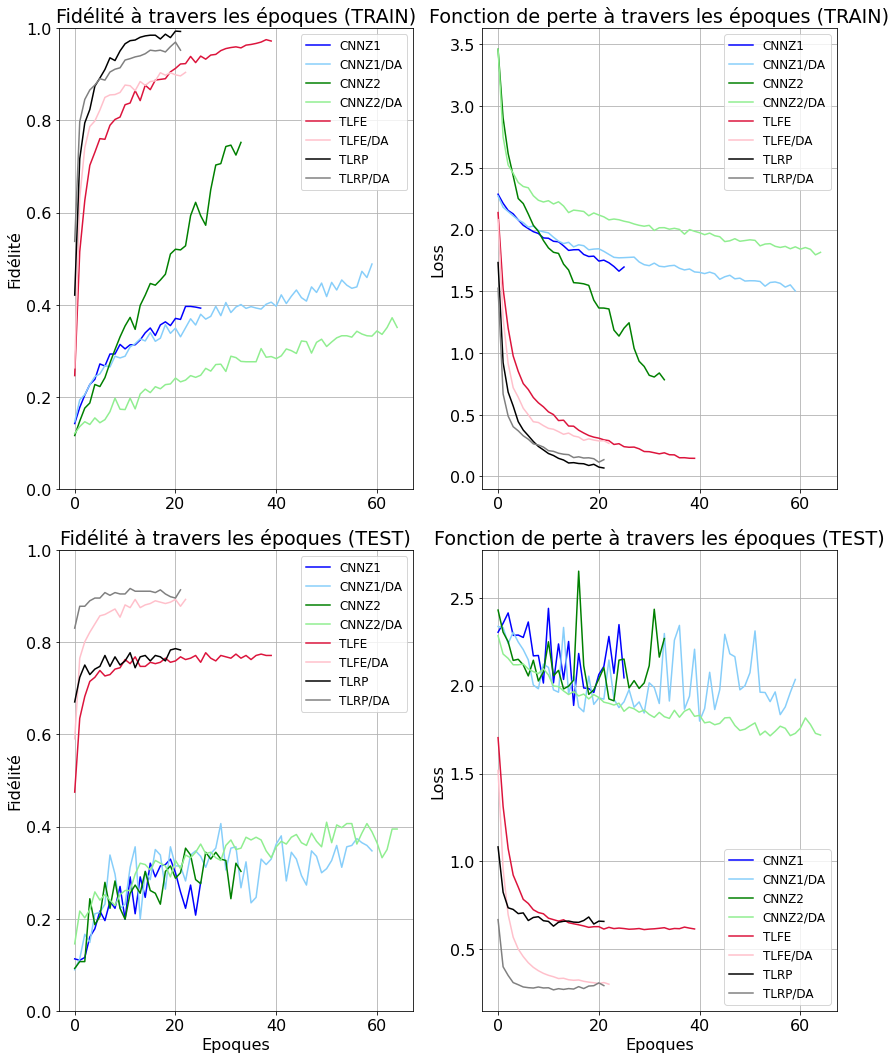

In [39]:
# Figures comparatives
tests = sorted(set(rdf.index.get_level_values(0)))
colors = ['blue','lightskyblue', 'green','lightgreen', 'crimson','pink', 'black','grey']

fig, axes = plt.subplots(2,2, figsize=(12,15))
for it, typ in enumerate(['Train','Test']):
    for test, col in zip(tests, colors):
        axes[it, 0].plot(rdf.loc[(test, typ), 'History Acc.'], label=test, color=col)
        axes[it, 1].plot(rdf.loc[(test, typ), 'History Loss'], label=test, color=col)
        
    axes[it, 0].set_title(f'Fidélité à travers les époques ({typ.upper()})')
    axes[it, 0].set_ylabel('Fidélité')
    axes[it, 1].set_title(f'Fonction de perte à travers les époques ({typ.upper()})')
    axes[it, 1].set_ylabel('Loss')
    axes[it, 0].set_ylim(0,1)
axes[it,0].set_xlabel('Epoques')
axes[it,1].set_xlabel('Epoques')
for ax in axes.flatten():
    ax.grid(True)
    ax.legend(fontsize=12)
fig.tight_layout()
plt.show()

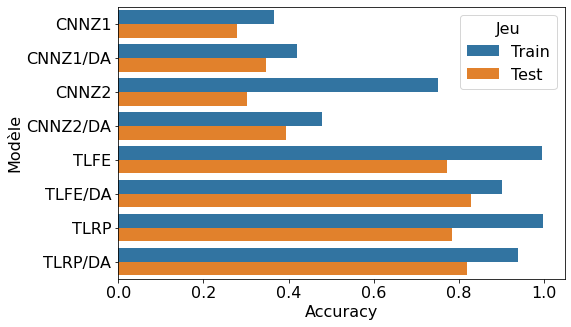

In [41]:
# Fidélité
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=fdf, y='Modèle', x='Accuracy', hue='Jeu', ax=ax)
plt.show()

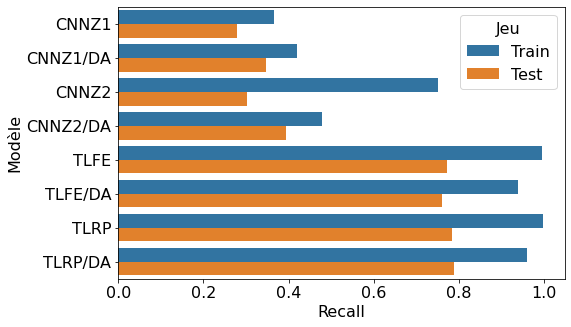

In [56]:
# Rappel
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=fdf, y='Modèle', x='Recall', hue='Jeu', ax=ax)
plt.show()

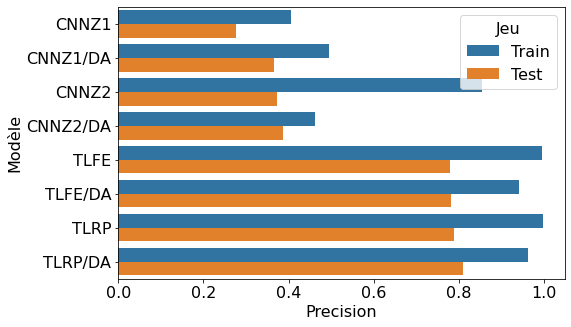

In [57]:
# Precision
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=fdf, y='Modèle', x='Precision', hue='Jeu', ax=ax)
plt.show()

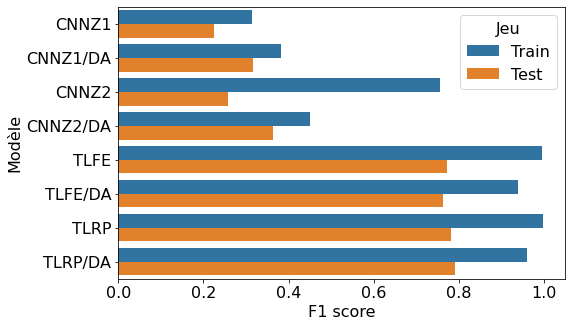

In [58]:
# F1 score
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=fdf, y='Modèle', x='F1 score', hue='Jeu', ax=ax)
plt.show()

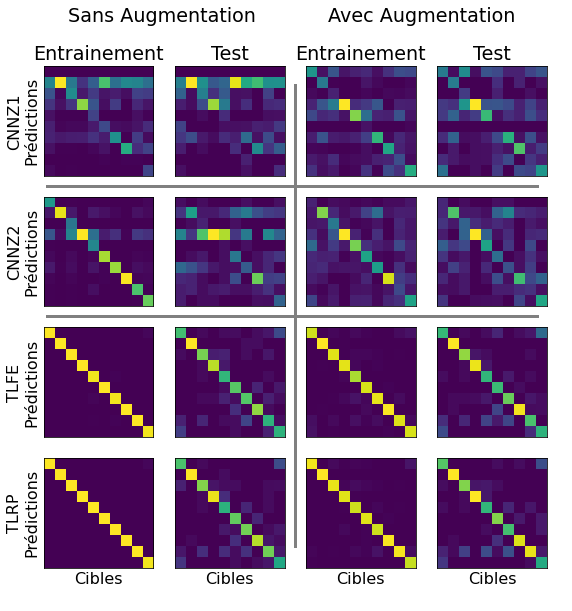

In [87]:
# Matrices de confusion normalisées
model_names = sorted(set(rdf.index.get_level_values(0)))
mwnda = [m for m in model_names if '/DA' not in m]
N = len(mwnda)

fig = plt.figure(figsize=(8,8))

for im, model in enumerate(mwnda):
    train = rdf.loc[model, 'Train']['Conf.Mat.'].T
    test = rdf.loc[model, 'Test']['Conf.Mat.'].T
    trainDA = rdf.loc[model+'/DA', 'Train']['Conf.Mat.'].T
    testDA = rdf.loc[model+'/DA', 'Test']['Conf.Mat.'].T
    
    plt.subplot(N, 4, 1+4*im)
    plt.imshow(train / train.sum(0))
    if not im: plt.title('Entrainement')  
    plt.ylabel(model + '\nPrédictions')
    plt.yticks([])
    plt.xticks([])
    if im == N-1:
        plt.xlabel('Cibles')

    plt.subplot(N, 4, 2+4*im)
    plt.imshow(test / test.sum(0))
    if not im: plt.title('Test')
    plt.yticks([])
    plt.xticks([])
    if im == N-1:
        plt.xlabel('Cibles')
    
    plt.subplot(N, 4, 3+4*im)
    plt.imshow(trainDA / trainDA.sum(0))
    if not im: plt.title('Entrainement')
    plt.yticks([])
    plt.xticks([])
    if im == N-1:
        plt.xlabel('Cibles')

    plt.subplot(N, 4, 4+4*im)
    plt.imshow(testDA / testDA.sum(0))
    if not im: plt.title('Test')
    plt.yticks([])
    plt.xticks([])
    if im == N-1:
        plt.xlabel('Cibles')

ax = fig.add_axes([0.05,0,0.5,1])
plt.title('Sans Augmentation')
plt.axis('off')

ax = fig.add_axes([0.5,0,0.5,1])
plt.title('Avec Augmentation')
plt.axis('off')

plt.plot([.53, .53], [.1, .9], color='grey', lw=3, transform=plt.gcf().transFigure, clip_on=False)
plt.plot([.1, .95], [0.725, 0.725], color='grey', lw=3,transform=plt.gcf().transFigure, clip_on=False)
plt.plot([.1, .95], [0.5, 0.5], color='grey', lw=3,transform=plt.gcf().transFigure, clip_on=False)

plt.tight_layout()
plt.show()

---

# Optimization
des hyperparamètres sur la couche classifier du modèle MobileNetV2

Ici nous allons utiliser `kerastuner` pour améliorer les hyperparamètres de la couche que nous avons ajouté au modèle transféré de Keras et séléctionner les meilleurs.

In [97]:
def model_builder(hp):
    # Transfer du modèle
    model = kr.applications.mobilenet_v2.MobileNetV2(
        weights='imagenet',
        include_top=False, 
        pooling='avg',
        input_shape=(*dim,3))
    
    # Gel du premier bloc
    for layer in model.layers[:-5]:  # BN, C2D, BN, ReLU, GAP2D
        layer.trainable = False
        
    # Ajout du second bloc fully-connected
    base_output = model.output
    
    # Optimisation des unités denses
    hp_units = hp.Int('dense_units',
                      min_value=32,
                      max_value=300,
                      step=32,
                      default=128)
    
    base_output = kr.layers.Dense(units=hp_units, activation='relu')(base_output)
    base_output = kr.layers.Dropout(0.2)(base_output)
    predictions = kr.layers.Dense(len(label_encoder.classes_), activation='softmax')(base_output)

    # Definition du nouveau model
    model = kr.models.Model(inputs=model.input, outputs=predictions)
    
    # Optimisation du taux d'apprentissage
    hp_learning_rate = hp.Choice(name='learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=hp_learning_rate), 
        loss="sparse_categorical_crossentropy", 
        metrics=["accuracy"])
    return model

In [98]:
# Optimisation du taux d'apprentissage pour l'optimiseur
# Constuction de l'optimiseur de kerastuner
tuner = kt.RandomSearch(model_builder, objective='val_accuracy', max_trials=5)
earlystop = kr.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

# Recherche des meilleurs paramètres
tuner.search(train_generator,
    validation_data=test_generator,
    epochs=epochs,
    callbacks=[earlystop])

# Hyperparametres optimaux
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best learning rate : {best_hps.get('learning_rate')}.\n
Best Dense units : {best_hps.get('dense_units')}.""")

Trial 5 Complete [00h 05m 26s]
val_accuracy: 0.7922848463058472

Best val_accuracy So Far: 0.7922848463058472
Total elapsed time: 00h 15m 36s
INFO:tensorflow:Oracle triggered exit

Best learning rate : 0.0001.

Best Dense units : 64.


Une fois les meilleurs hyperparamètres trouvés, **on peut ré-entrainer le modèle grâce au tuner**, sur 30 époques avant de le sauvegarder pour les prochaines améliorations *(fine-tuning)* :

In [99]:
# ~20 min
hypermodel = tuner.hypermodel.build(best_hps)
hypermodel.fit(train_generator,
    validation_data=test_generator,
    epochs=epochs,
    verbose=verbose)
hypermodel.save('MobileNetV2_hypermodel.h5')
print("Modèle sauvegardé")

Epoch 1/100
37/37 - 14s - loss: 1.9962 - accuracy: 0.3353 - val_loss: 1.2786 - val_accuracy: 0.6528 - 14s/epoch - 372ms/step
Epoch 2/100
37/37 - 11s - loss: 1.3127 - accuracy: 0.5963 - val_loss: 0.8947 - val_accuracy: 0.7418 - 11s/epoch - 304ms/step
Epoch 3/100
37/37 - 11s - loss: 1.0101 - accuracy: 0.6729 - val_loss: 0.7709 - val_accuracy: 0.7537 - 11s/epoch - 296ms/step
Epoch 4/100
37/37 - 11s - loss: 0.8538 - accuracy: 0.7301 - val_loss: 0.6946 - val_accuracy: 0.7774 - 11s/epoch - 294ms/step
Epoch 5/100
37/37 - 11s - loss: 0.8010 - accuracy: 0.7257 - val_loss: 0.6711 - val_accuracy: 0.7596 - 11s/epoch - 294ms/step
Epoch 6/100
37/37 - 11s - loss: 0.7249 - accuracy: 0.7524 - val_loss: 0.6482 - val_accuracy: 0.7656 - 11s/epoch - 298ms/step
Epoch 7/100
37/37 - 11s - loss: 0.6400 - accuracy: 0.7807 - val_loss: 0.6443 - val_accuracy: 0.7893 - 11s/epoch - 300ms/step
Epoch 8/100
37/37 - 11s - loss: 0.6282 - accuracy: 0.7948 - val_loss: 0.6336 - val_accuracy: 0.7774 - 11s/epoch - 295ms/step


37/37 - 11s - loss: 0.1166 - accuracy: 0.9717 - val_loss: 0.6382 - val_accuracy: 0.7953 - 11s/epoch - 299ms/step
Epoch 67/100
37/37 - 11s - loss: 0.1072 - accuracy: 0.9717 - val_loss: 0.6291 - val_accuracy: 0.8012 - 11s/epoch - 302ms/step
Epoch 68/100
37/37 - 11s - loss: 0.1144 - accuracy: 0.9643 - val_loss: 0.6416 - val_accuracy: 0.7953 - 11s/epoch - 294ms/step
Epoch 69/100
37/37 - 11s - loss: 0.0907 - accuracy: 0.9770 - val_loss: 0.6542 - val_accuracy: 0.7893 - 11s/epoch - 290ms/step
Epoch 70/100
37/37 - 11s - loss: 0.1011 - accuracy: 0.9770 - val_loss: 0.6587 - val_accuracy: 0.7893 - 11s/epoch - 289ms/step
Epoch 71/100
37/37 - 11s - loss: 0.1173 - accuracy: 0.9651 - val_loss: 0.6601 - val_accuracy: 0.7953 - 11s/epoch - 296ms/step
Epoch 72/100
37/37 - 11s - loss: 0.1016 - accuracy: 0.9688 - val_loss: 0.6545 - val_accuracy: 0.8101 - 11s/epoch - 310ms/step
Epoch 73/100
37/37 - 11s - loss: 0.0976 - accuracy: 0.9762 - val_loss: 0.6477 - val_accuracy: 0.7982 - 11s/epoch - 304ms/step
Epoch

---

# Fine tuning
Comme nous l'avons vu dans le schéma de l'architecture Xception, ce modèle dispose de 3 blocs : le flux, d'entrée, le flux moyen et le flux de sortie. **Nous allons ré-entrainer le dernier bloc sur le modèle sauvegardé** dont les paramètres ont été améliorés :

In [37]:
def mobilenet_fine_tune(nb_layers):
    hypermodel_t = kr.models.load_model('./MobileNetV2_hypermodel.h5')
    
    # Réentrainement des dernières couches
    for i, layer in enumerate(hypermodel_t.layers):
        if i < nb_layers:
            layer.trainable = False
        else:
            layer.trainable = True
            
    # Compilation
    hypermodel_t.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    return hypermodel_t

##### Sans Data Augmentation

In [114]:
# Ne pas réapprendre les X couches
my_tuned_model = mobilenet_fine_tune(158)
fine_tuned_history = my_tuned_model.fit(X_train/255., y_train, validation_data=(X_test/255., y_test),
    epochs=epochs,
    callbacks=[earlystop],
    verbose=verbose)

Epoch 1/100
43/43 - 4s - loss: 0.0379 - accuracy: 0.9903 - val_loss: 0.6997 - val_accuracy: 0.8101 - 4s/epoch - 96ms/step
Epoch 2/100
43/43 - 2s - loss: 0.0351 - accuracy: 0.9903 - val_loss: 0.6997 - val_accuracy: 0.8101 - 2s/epoch - 39ms/step
Epoch 3/100
43/43 - 2s - loss: 0.0301 - accuracy: 0.9941 - val_loss: 0.6997 - val_accuracy: 0.8101 - 2s/epoch - 38ms/step
Epoch 4/100
43/43 - 2s - loss: 0.0355 - accuracy: 0.9881 - val_loss: 0.6997 - val_accuracy: 0.8101 - 2s/epoch - 38ms/step
Epoch 5/100
43/43 - 2s - loss: 0.0284 - accuracy: 0.9941 - val_loss: 0.6997 - val_accuracy: 0.8101 - 2s/epoch - 37ms/step
Epoch 6/100
43/43 - 2s - loss: 0.0362 - accuracy: 0.9941 - val_loss: 0.6997 - val_accuracy: 0.8101 - 2s/epoch - 38ms/step


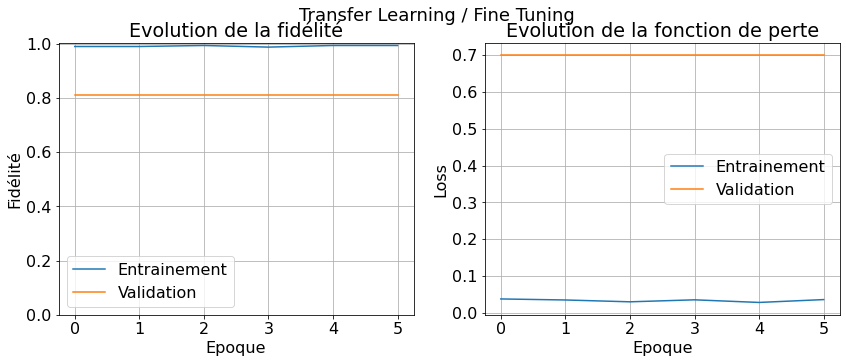

In [115]:
plot_history_scores(fine_tuned_history, name='Transfer Learning / Fine Tuning\n', ymin=0)

In [116]:
y_pred_train = my_tuned_model.predict(X_train/255.).argmax(axis=-1)
y_pred_test = my_tuned_model.predict(X_test/255.).argmax(axis=-1)

In [117]:
y_test_s = label_encoder.inverse_transform(y_test)

In [118]:
print(sk.metrics.classification_report(y_test, y_pred_test, target_names=sorted(set(y_test_s))))

                                precision    recall  f1-score   support

American Staffordshire Terrier       0.67      0.73      0.70        33
            Australian Terrier       0.97      1.00      0.99        39
                        Beagle       0.77      0.87      0.82        39
              Blenheim Spaniel       0.90      0.92      0.91        38
                English Setter       0.85      0.72      0.78        32
               German Shepherd       0.95      0.68      0.79        31
              Golden Retriever       0.83      0.80      0.81        30
                   Groenendael       0.79      0.90      0.84        30
            Labrador Retriever       0.66      0.68      0.67        34
     Staffordshire Bullterrier       0.74      0.74      0.74        31

                      accuracy                           0.81       337
                     macro avg       0.81      0.80      0.80       337
                  weighted avg       0.82      0.81      0.81 

##### Avec Data Augmentation

In [ ]:
# Ne pas réapprendre les X couches
my_tuned_model = mobilenet_fine_tune(158)
fine_tuned_history = my_tuned_model.fit(train_generator,
    validation_data=test_generator,
    epochs=epochs,
    callbacks=[earlystop],
    verbose=verbose)

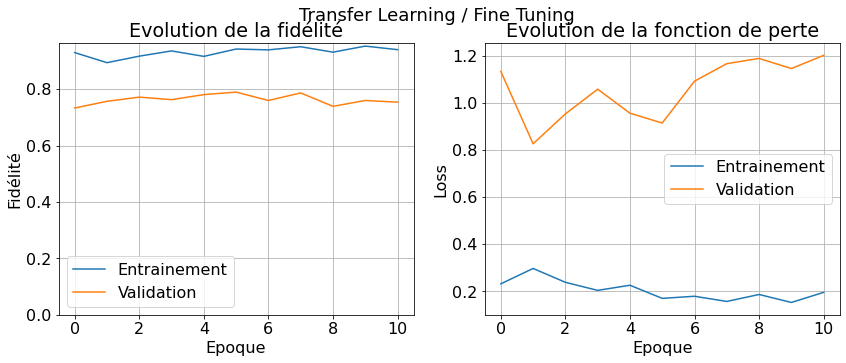

In [106]:
plot_history_scores(fine_tuned_history, name='Transfer Learning / Fine Tuning / Data Augmentation\n', ymin=0)

In [107]:
y_pred_train = my_tuned_model.predict(X_train/255.).argmax(axis=-1)
y_pred_test = my_tuned_model.predict(X_test/255.).argmax(axis=-1)

In [109]:
y_test_s = label_encoder.inverse_transform(y_test)

In [110]:
print(sk.metrics.classification_report(y_test, y_pred_test, target_names=sorted(set(y_test_s))))

                                precision    recall  f1-score   support

American Staffordshire Terrier       0.58      0.64      0.61        33
            Australian Terrier       0.83      1.00      0.91        39
                        Beagle       0.74      0.79      0.77        39
              Blenheim Spaniel       0.94      0.82      0.87        38
                English Setter       0.74      0.72      0.73        32
               German Shepherd       0.91      0.65      0.75        31
              Golden Retriever       0.81      0.83      0.82        30
                   Groenendael       0.73      0.80      0.76        30
            Labrador Retriever       0.64      0.68      0.66        34
     Staffordshire Bullterrier       0.65      0.55      0.60        31

                      accuracy                           0.75       337
                     macro avg       0.76      0.75      0.75       337
                  weighted avg       0.76      0.75      0.75 

---

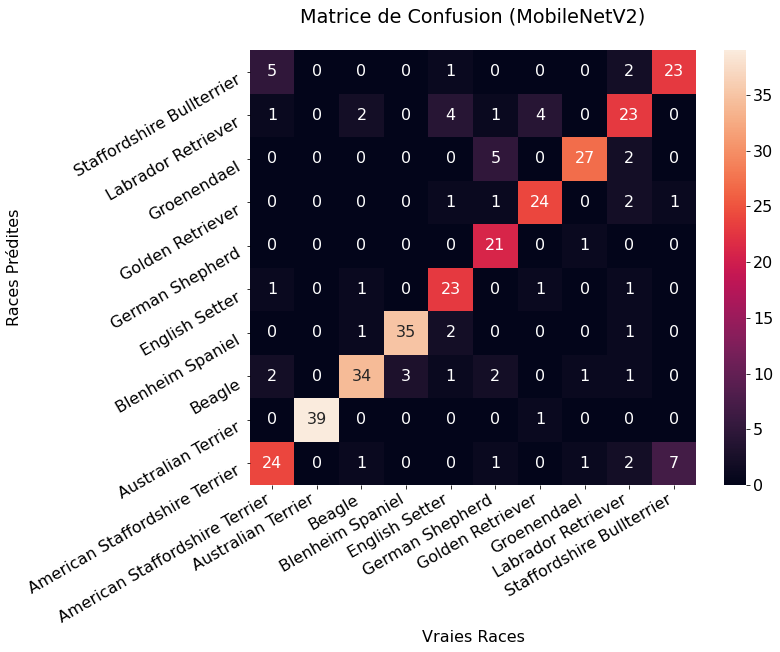

In [145]:
# Inverse transform of encoding
y_pred_s = label_encoder.inverse_transform(y_pred_test)
y_test_s = label_encoder.inverse_transform(y_test)

# Confusion Matrix
cf_matrix = sk.metrics.confusion_matrix(y_test, y_pred_test)

fig = plt.figure(figsize=(10,8))
ax = sns.heatmap(cf_matrix.T[::-1], annot=True)
ax.set_xlabel("Vraies Races")
ax.set_ylabel("Races Prédites")
ax.xaxis.set_ticklabels(label_encoder.classes_, rotation=30, horizontalalignment='right')
ax.yaxis.set_ticklabels(label_encoder.classes_[::-1], rotation=30, verticalalignment='top')
plt.title("Matrice de Confusion (MobileNetV2)\n")
plt.show()

La matrice de confusion et le rapport de classification nous indiquent que les résultats sont satisfaisants.ccuracy globale sur le jeu de test est de 0.72 et la matrice présente bien les couples predict / true majoritaires en diagonale.Nous allons visualiser quelques-unes de ces prédictions avec leurs labels :

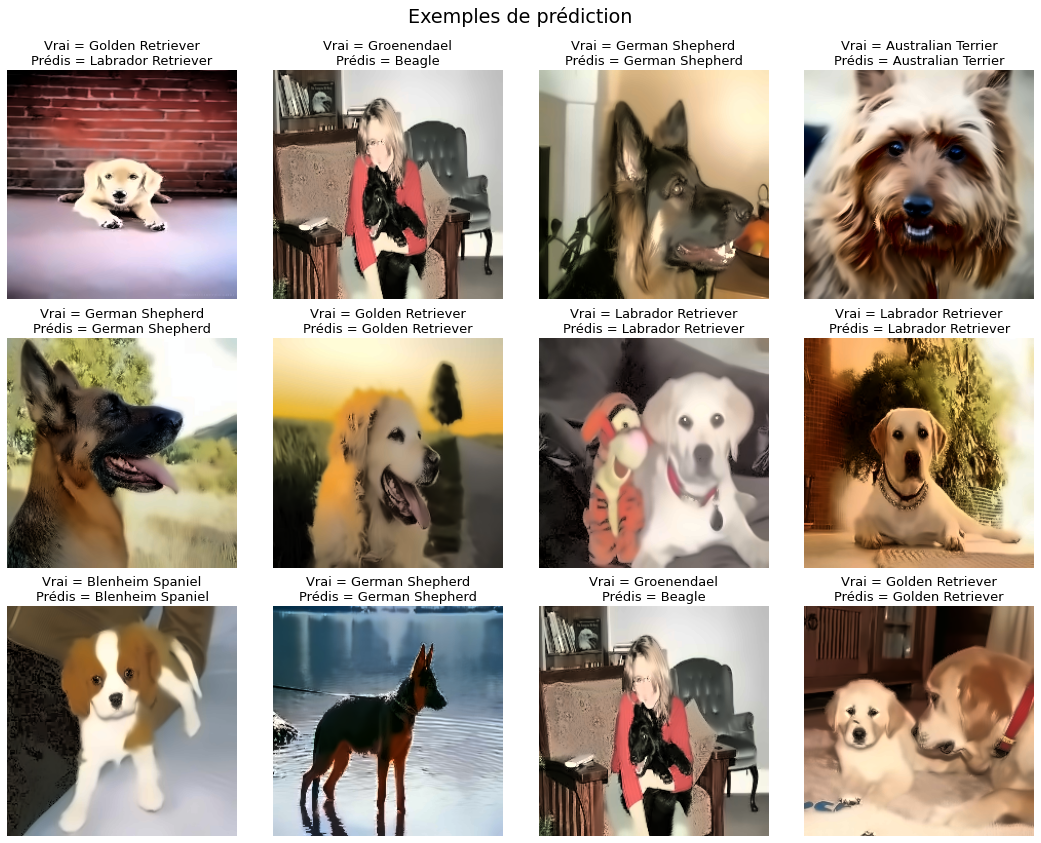

In [161]:
fig = plt.figure(1, figsize=(15,12))
plt.suptitle("Exemples de prédiction")
for i in range(12):
    r = int(np.random.randint(0, X_test.shape[0], 1))
    plt.subplot(3,4,i+1)
    plt.imshow(kr.preprocessing.image.array_to_img(X_test[r]))
    plt.title(f'Vrai = {y_test_s[r]}\nPrédis = {y_pred_s[r]}', fontsize=13)
    plt.axis('off')
plt.tight_layout()
plt.show()

---

# Toutes les races

## Entrainement

In [6]:
# Toutes les races
try:
    with open('XXyy.pkl', 'rb') as file:
        X_train, X_test, y_train, y_test, label_encoder = pickle.load(file)
        
except:        
    def loading_images(df):
        img_list, labels = [], []
        for index, address, breed in zip(df.index, df['Adresse'], df['Race']):
            img = cv2.imread(address)
            res_img = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR) 
            img_list.append(res_img)
            labels.append(breed)
        return img_list, labels

    X, y = loading_images(df[df['Race'].isin(breed_names[:])])   # !!!!!!!!!!!!!!!!!
    X = np.array(X)
    y = np.array(y)
    
    mask = np.arange(len(y))
    np.random.seed(42)
    np.random.shuffle(mask)
    X, y = X[mask], y[mask]
    X = X.astype(np.float32)

    label_encoder = sk.preprocessing.LabelEncoder()
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
        X, y, test_size=test_size, stratify=y)
    print(f"Taille du jeu d'entrainement : {len(X_train)}")
    print(f"Taille du jeu de test        : {len(X_test)}")
    del X, y

    # Taille maximale du fichier 12Go
    with open('XXyy.pkl', 'wb') as file:
        pickle.dump([X_train, X_test, y_train, y_test, label_encoder], file)

In [7]:
X_train = tf.keras.applications.mobilenet_v2.preprocess_input(X_train)
X_test = tf.keras.applications.mobilenet_v2.preprocess_input(X_test)

In [10]:
# Entrainement
train_datagen = kr.preprocessing.image.ImageDataGenerator(
    rotation_range=15,  # 0
    width_shift_range=0.2,  # 0
    height_shift_range=0.2,  # 0
    shear_range=0.2,  # 0
    zoom_range=0.2,  # 0
    horizontal_flip=True,
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
train_generator_TL = train_datagen.flow(X_train, y_train, batch_size=batch_size)

In [11]:
# Test (seulement une mise à l'échelle)
test_datagen = kr.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
test_generator_TL = test_datagen.flow(X_test, y_test, batch_size=batch_size)

In [21]:
%%time
# >1h
model_partial = init_TL_RP()
history_partial_DA = model_partial.fit(
    train_generator_TL,
    validation_data=test_generator_TL,
    steps_per_epoch=len(X_train)//batch_size,
    epochs=25,#epochs,
    callbacks=callbacks,
    verbose=verbose)

Epoch 1/25
444/444 - 172s - loss: 3.4572 - accuracy: 0.2468 - val_loss: 1.8151 - val_accuracy: 0.5607 - lr: 1.0000e-04 - 172s/epoch - 388ms/step
Epoch 2/25
444/444 - 156s - loss: 1.9838 - accuracy: 0.4814 - val_loss: 1.2671 - val_accuracy: 0.6577 - lr: 1.0000e-04 - 156s/epoch - 352ms/step
Epoch 3/25
444/444 - 131s - loss: 1.6211 - accuracy: 0.5521 - val_loss: 1.1148 - val_accuracy: 0.6842 - lr: 1.0000e-04 - 131s/epoch - 296ms/step
Epoch 4/25
444/444 - 132s - loss: 1.4448 - accuracy: 0.5946 - val_loss: 1.0523 - val_accuracy: 0.6914 - lr: 1.0000e-04 - 132s/epoch - 297ms/step
Epoch 5/25
444/444 - 135s - loss: 1.3429 - accuracy: 0.6200 - val_loss: 1.0117 - val_accuracy: 0.7017 - lr: 1.0000e-04 - 135s/epoch - 305ms/step
Epoch 6/25
444/444 - 134s - loss: 1.2487 - accuracy: 0.6448 - val_loss: 0.9820 - val_accuracy: 0.7053 - lr: 1.0000e-04 - 134s/epoch - 302ms/step
Epoch 7/25
444/444 - 142s - loss: 1.1815 - accuracy: 0.6592 - val_loss: 0.9595 - val_accuracy: 0.7196 - lr: 1.0000e-04 - 142s/epoc

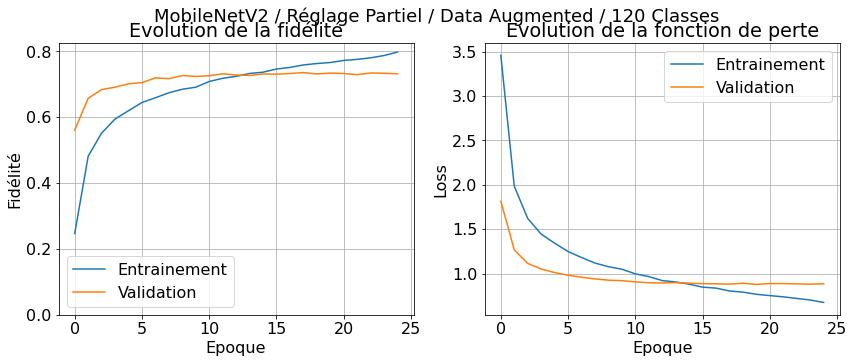

In [22]:
plot_history_scores(history_partial_DA, name='MobileNetV2 / Réglage Partiel / Data Augmented / 120 Classes\n', ymin=0)

In [23]:
model_partial.save('MobileNetV2_partial120.h5')
with open('label_encoder120.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

## Matrices de confusion

In [8]:
modelF = kr.models.load_model('./MobileNetV2_partial120.h5')
with open('label_encoder120.pkl', 'rb') as file:
        label_encoderF = pickle.load(file)

In [19]:
# ~1 min
y_pred_train, y_pred_test = [], []
L = 500
for i in range(len(X_train) // L):
    print(i, i*L, (i+1)*L, len(X_train))
    y_pred_train.extend( modelF.predict(X_train[i*L:(i+1)*L]).argmax(axis=-1).tolist() )
y_pred_train.extend( modelF.predict(X_train[(i+1)*L:]).argmax(axis=-1).tolist() )
for i in range(len(X_test) // L):
    print(i, i*L, (i+1)*L, len(X_test))
    y_pred_test.extend( modelF.predict(X_test[i*L:(i+1)*L]).argmax(axis=-1).tolist() )
y_pred_test.extend( modelF.predict(X_test[(i+1)*L:]).argmax(axis=-1).tolist() )

y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)
y_test_s = label_encoderF.inverse_transform(y_test)

0 0 500 16464
1 500 1000 16464
2 1000 1500 16464
3 1500 2000 16464
4 2000 2500 16464
5 2500 3000 16464
6 3000 3500 16464
7 3500 4000 16464
8 4000 4500 16464
9 4500 5000 16464
10 5000 5500 16464
11 5500 6000 16464
12 6000 6500 16464
13 6500 7000 16464
14 7000 7500 16464
15 7500 8000 16464
16 8000 8500 16464
17 8500 9000 16464
18 9000 9500 16464
19 9500 10000 16464
20 10000 10500 16464
21 10500 11000 16464
22 11000 11500 16464
23 11500 12000 16464
24 12000 12500 16464
25 12500 13000 16464
26 13000 13500 16464
27 13500 14000 16464
28 14000 14500 16464
29 14500 15000 16464
30 15000 15500 16464
31 15500 16000 16464
0 0 500 4116
1 500 1000 4116
2 1000 1500 4116
3 1500 2000 4116
4 2000 2500 4116
5 2500 3000 4116
6 3000 3500 4116
7 3500 4000 4116


In [66]:
breed_results = pd.DataFrame(sk.metrics.classification_report(
    y_test, y_pred_test, output_dict=True, target_names=sorted(set(y_test_s)))).T
breed_results.columns = ['Précision','Rappel','F1-Score','Occurences']
breed_results = breed_results.astype(dtype= {'Occurences': "int64"})
breed_results.to_pickle('breed_results.pkl')
breed_results

Précision    Rappel  F1-Score  Occurences
Affenpinscher                    0.892857  0.833333  0.862069          30
Afghan Hound                     0.836364  0.958333  0.893204          48
African Hunting Dog              0.850000  1.000000  0.918919          34
Airedale                         0.866667  0.650000  0.742857          40
American Staffordshire Terrier   0.562500  0.545455  0.553846          33
...                                   ...       ...       ...         ...
Wire-Haired Fox Terrier          0.769231  0.645161  0.701754          31
Yorkshire Terrier                0.633333  0.575758  0.603175          33
accuracy                         0.732021  0.732021  0.732021           0
macro avg                        0.737526  0.727144  0.725852        4116
weighted avg                     0.740188  0.732021  0.729797        4116

[123 rows x 4 columns]

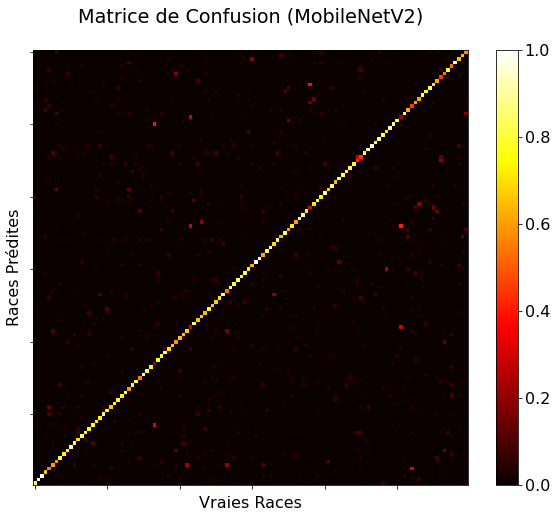

In [55]:
# Matrice de Confusion
y_pred_s = label_encoderF.inverse_transform(y_pred_test)
y_test_s = label_encoderF.inverse_transform(y_test)

cf_matrix = sk.metrics.confusion_matrix(y_test, y_pred_test).T
cf_matrix = cf_matrix / cf_matrix.sum(0)

fig, ax = plt.subplots(figsize=(10,8))
b = ax.imshow(cf_matrix[::-1], cmap='hot')
ax.set_xlabel("Vraies Races")
ax.set_ylabel("Races Prédites")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
fig.colorbar(b)
plt.title("Matrice de Confusion (MobileNetV2)\n")
plt.show()

---

# Application

In [67]:
from IPython.display import IFrame
IFrame('http://localhost:8501/', width=800, height=1000)

In [67]:
from IPython.display import IFrame
IFrame('http://localhost:8501/', width=800, height=1000)